In [ ]:
##
##
##
## PowerSystem_Dataset
##
##

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [2]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
data_1 = pd.read_csv("data1.csv")

#on ne load qu'une simulation

In [4]:
data_1
#haut du dataset

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,0,0,0,0,0,0,0,0,0,Natural
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,0,0,0,0,0,0,0,0,0,Natural
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,0,0,0,0,0,0,0,0,0,Natural
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,0,0,0,0,0,0,0,0,0,Natural


In [5]:
##
##
##
## description du dataset 
##
##
## 

In [6]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4966.0,4966.0,4966.000000,4966.000000,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,130994.354960,8.610555,131258.159486,1.681621,131575.619600,-17.467920,397.526132,10.507730,390.915035,...,0.0,0.0,0.037857,0.022755,0.018526,0.029803,0.0,0.0,0.0,0.0
std,98.099812,6545.849798,115.044643,2692.553537,96.408966,2772.274253,97.437891,181.156073,111.699778,143.141274,...,0.0,0.0,0.190871,0.149136,0.134857,0.170060,0.0,0.0,0.0,0.0
min,-179.988962,24998.050190,-179.994691,102449.381200,-179.960314,98161.852050,-179.988962,0.000000,-179.736860,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,317.146520,-90.269501,325.844245,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,389.658080,6.720795,391.855400,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321182,115.522615,469.127820,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.994691,146302.530500,179.971773,146327.603700,179.966044,146452.970100,179.925936,1771.039920,179.988962,1263.642110,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [7]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [8]:
print(pd.Series(data_1['marker']).value_counts())

Attack      3866
Natural      927
NoEvents     173
Name: marker, dtype: int64


In [9]:
#il n'y a pas beaucoup d'attaques (NoEvents)

In [10]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 1,'NoEvents':0})

In [11]:
data_1.isnull().values.any() #Nan ?

False

In [12]:
id = 0
for v in data_1.isnull().sum(axis = 0).values: # voici les Nans
    if v != 0:
        print(id, v)
    id+=1

# pas de nan

In [13]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
data_1 = data_1.drop(rows_with_infini.index)
#pas de inf values

In [14]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [15]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [ ]:
#regardons la répartition des valeurs pour chaque variable

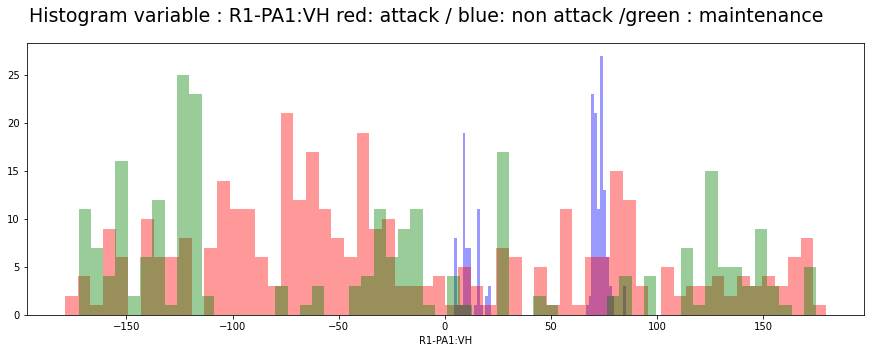

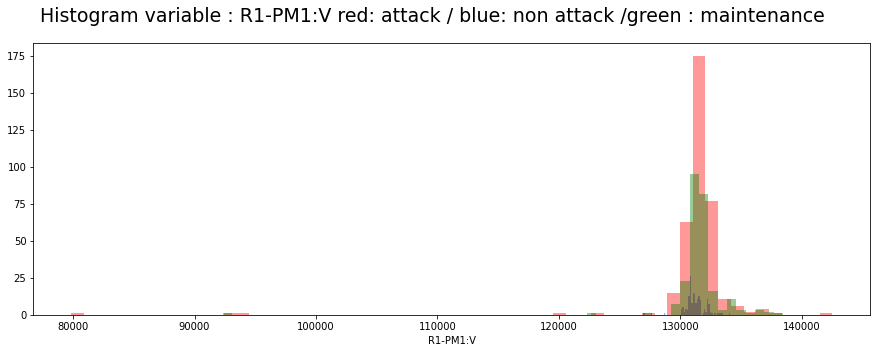

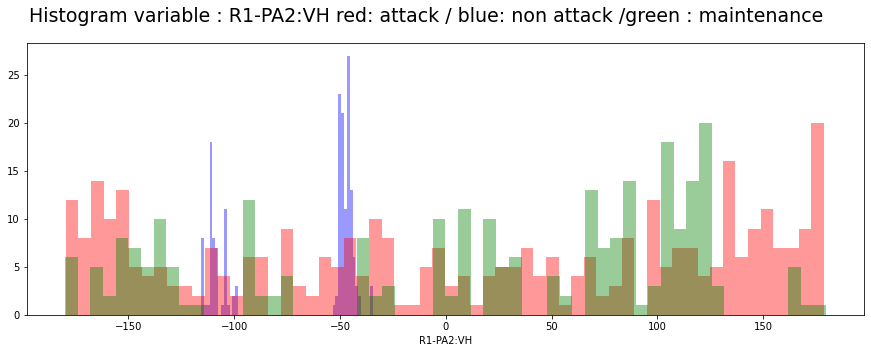

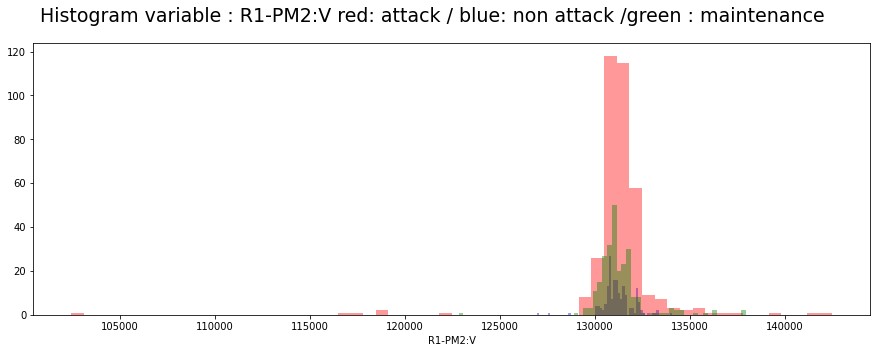

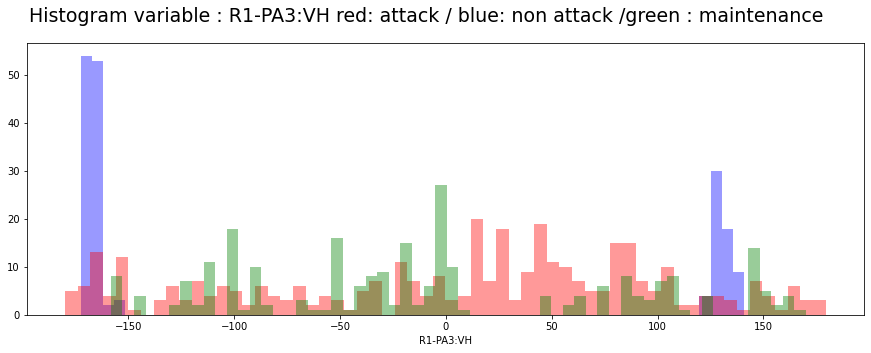

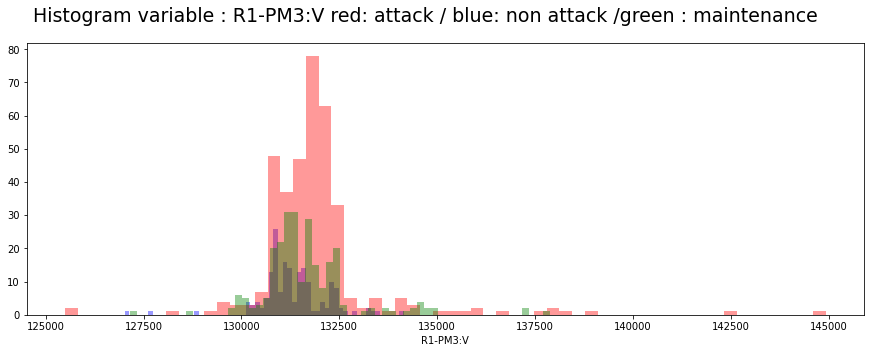

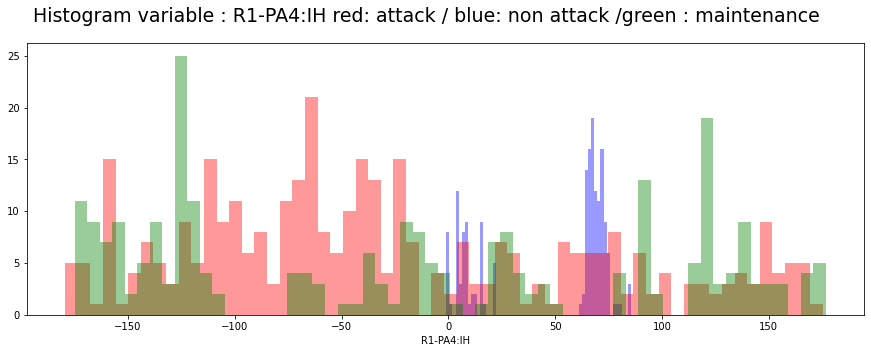

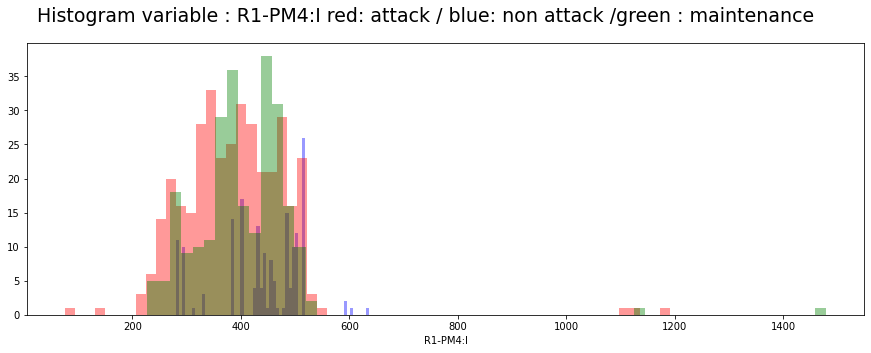

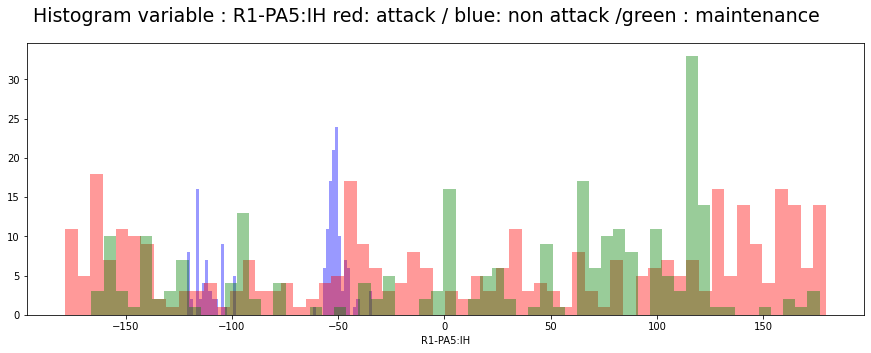

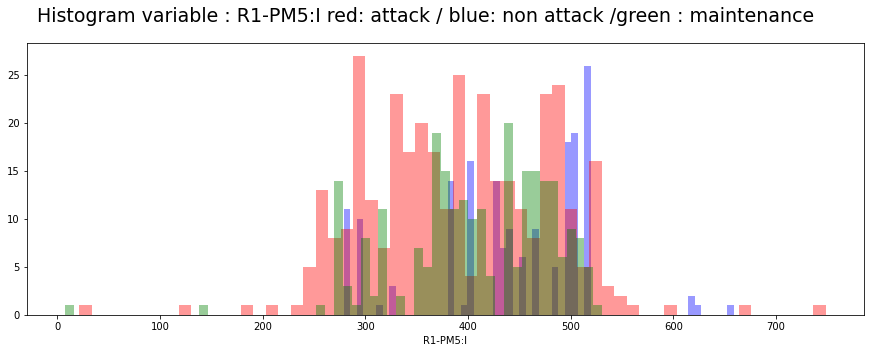

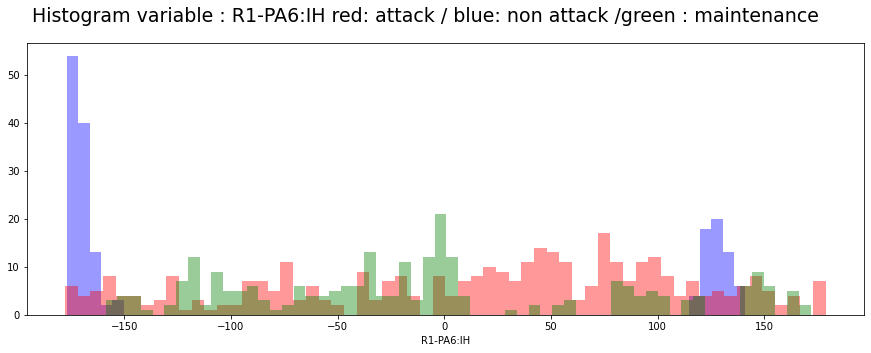

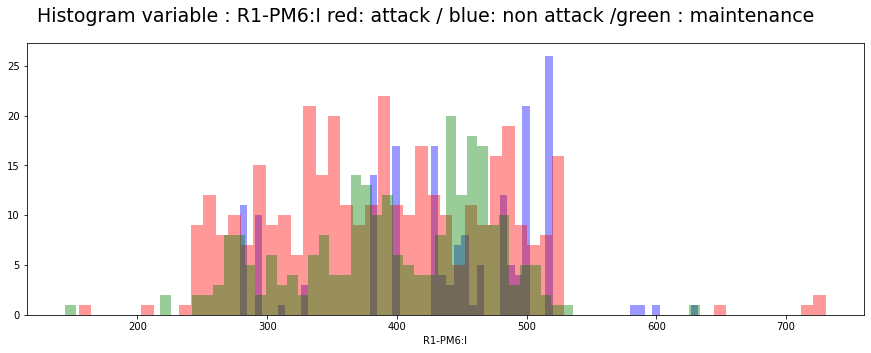

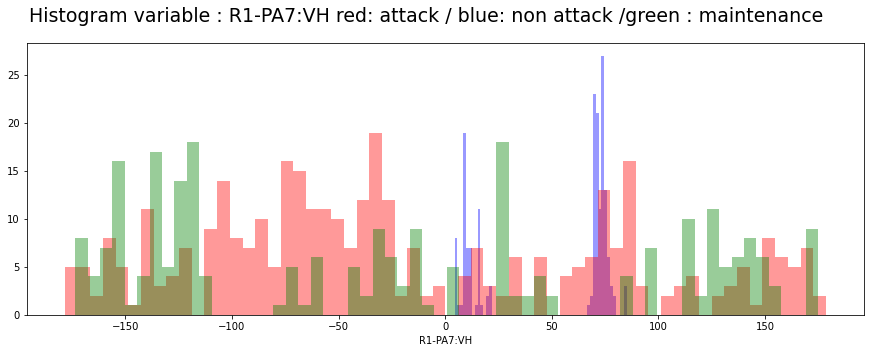

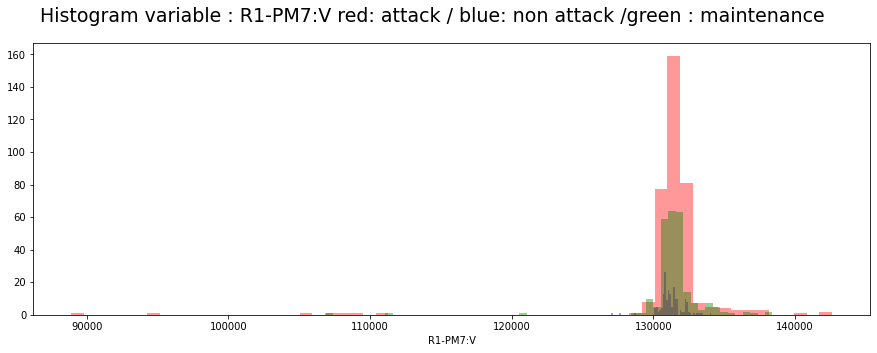

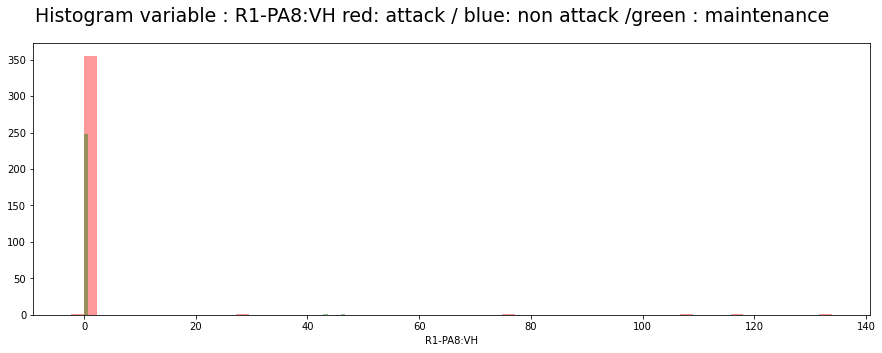

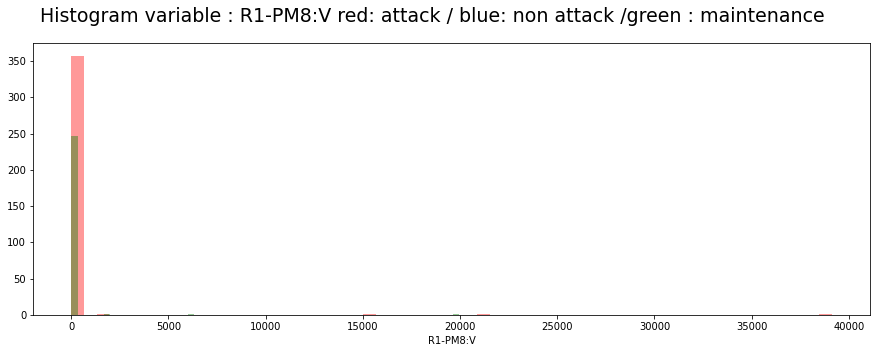

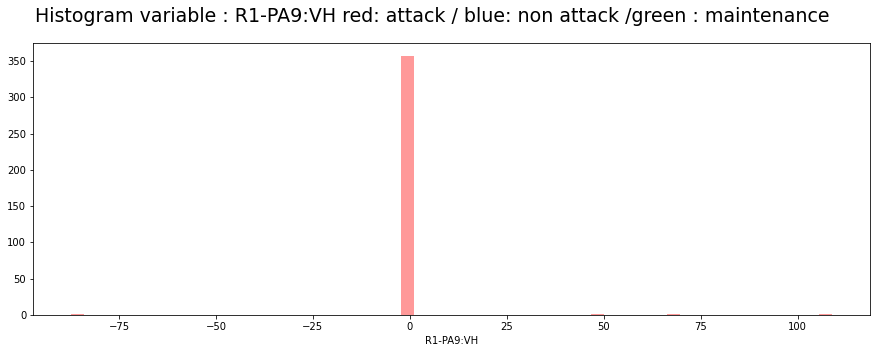

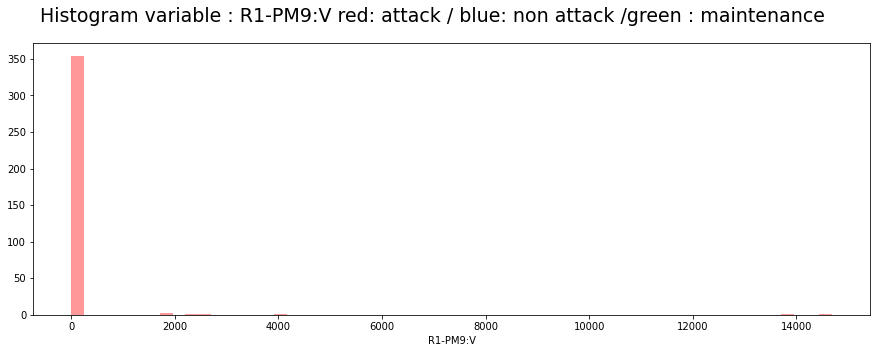

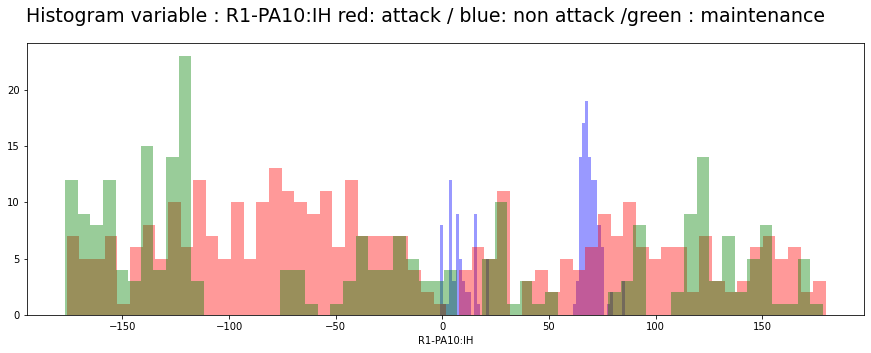

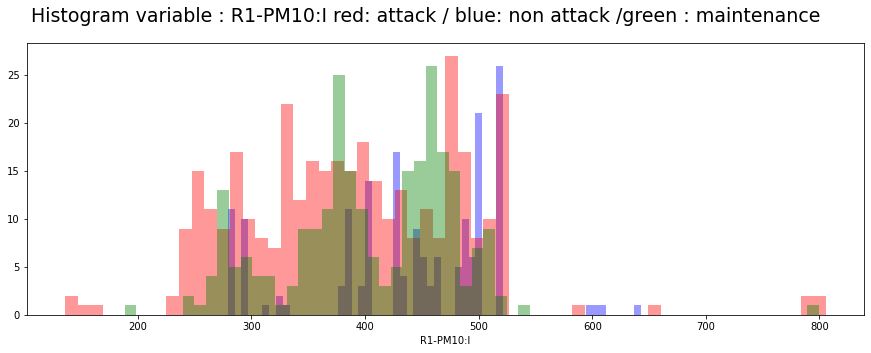

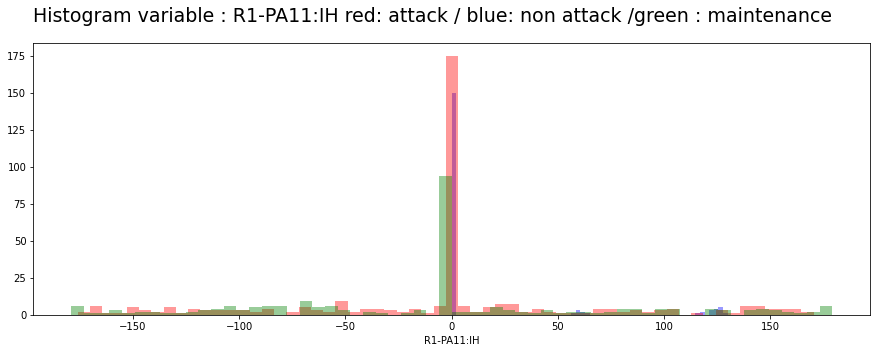

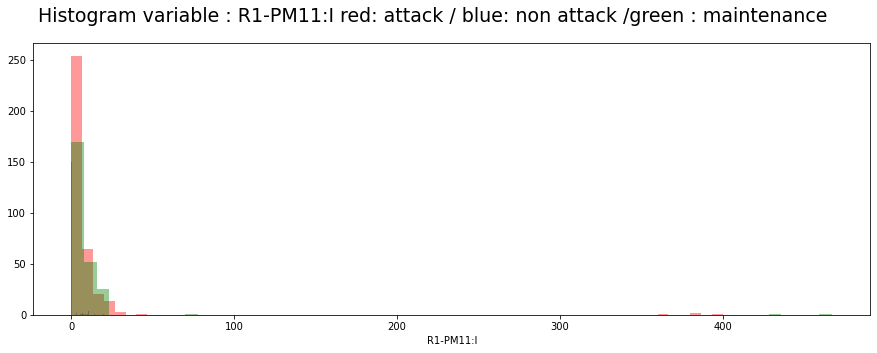

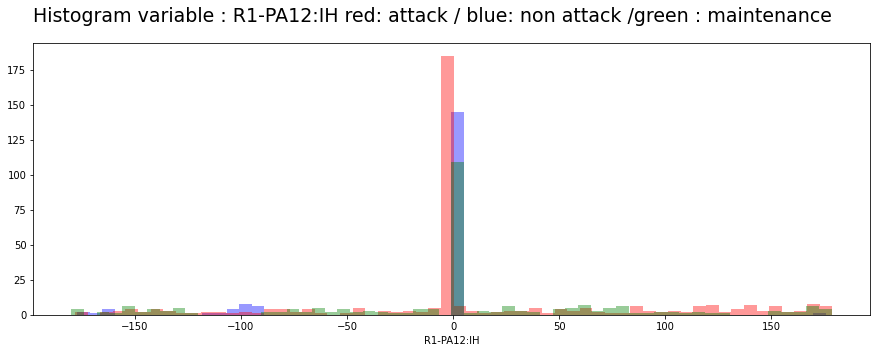

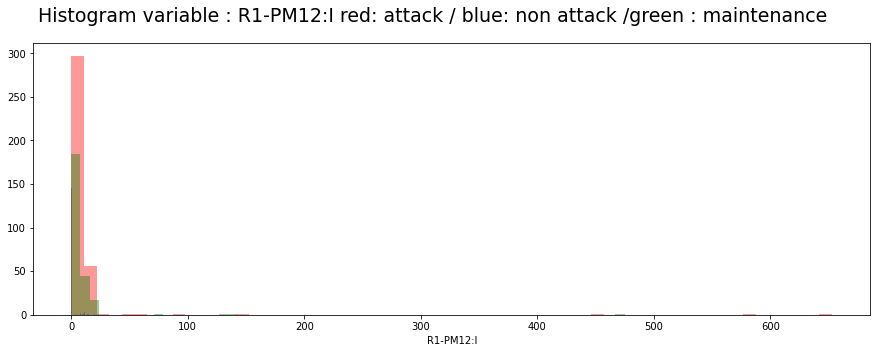

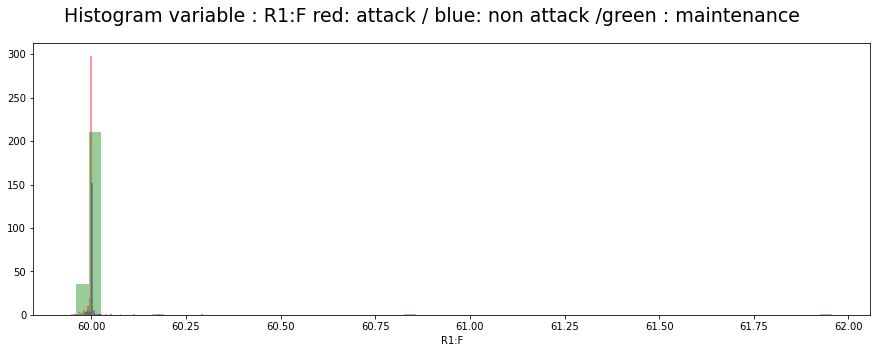

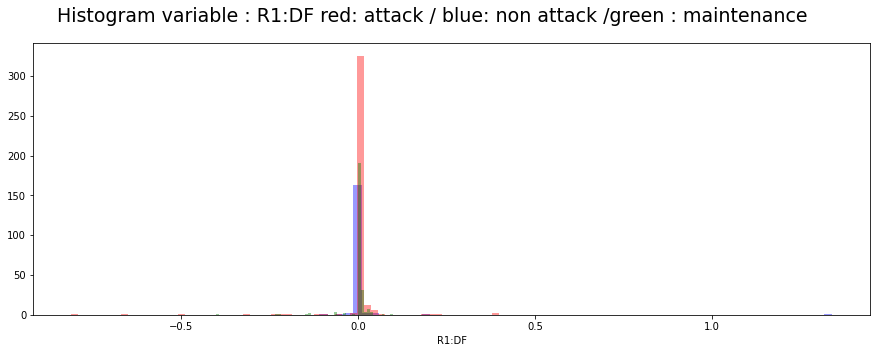

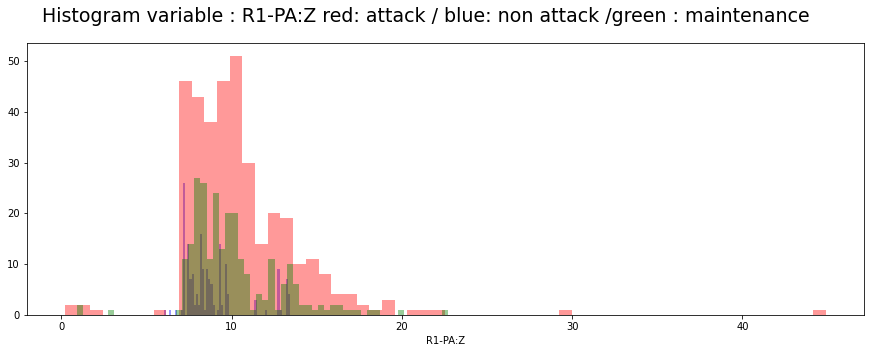

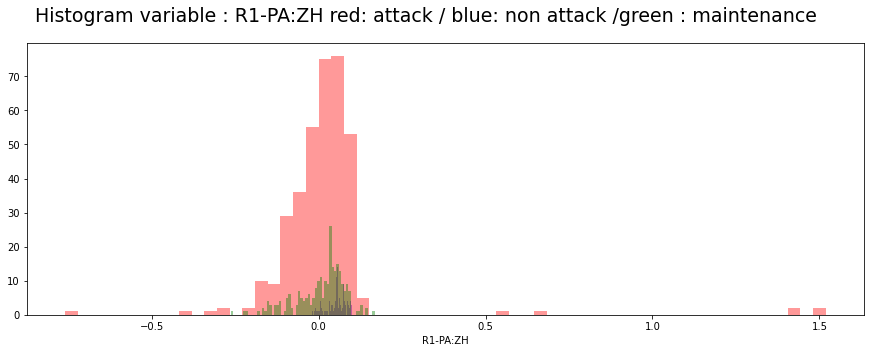

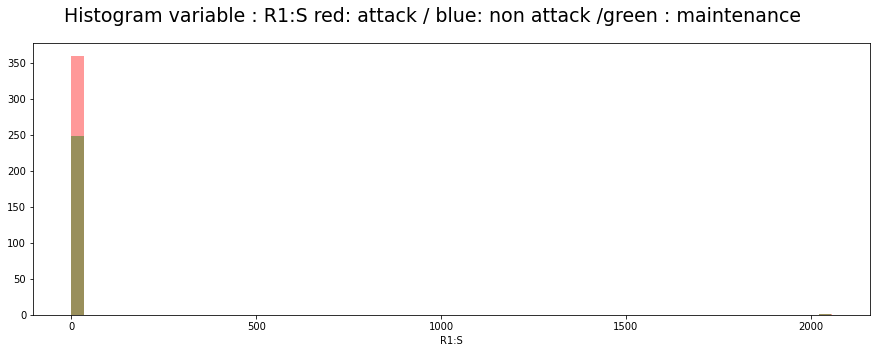

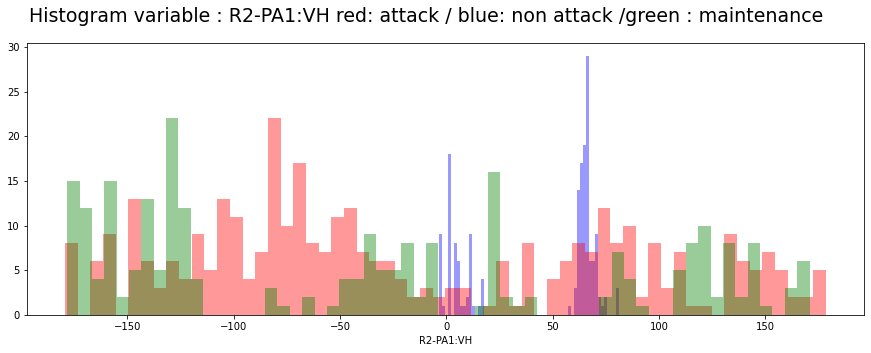

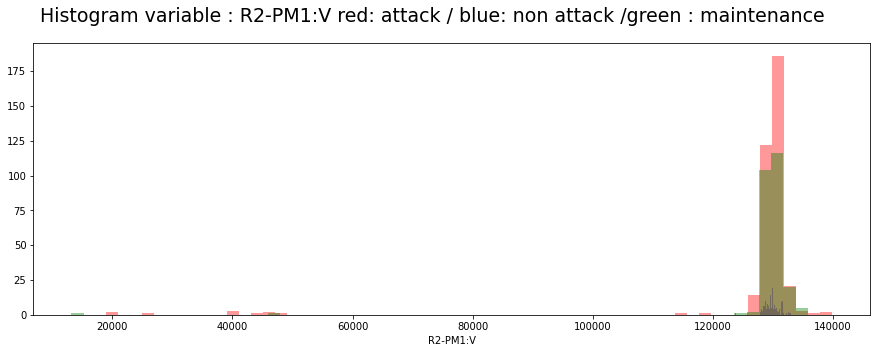

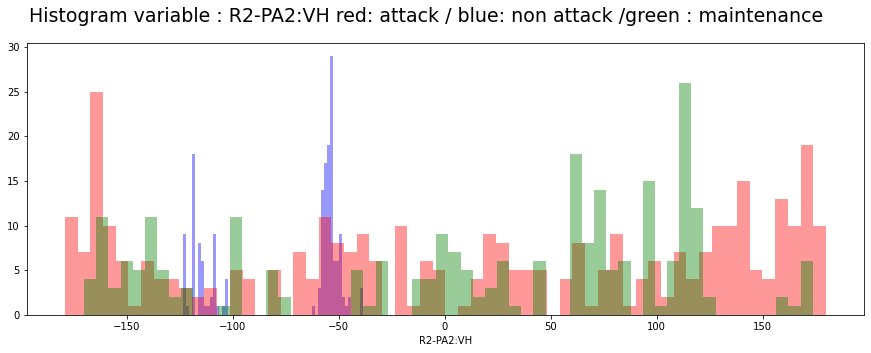

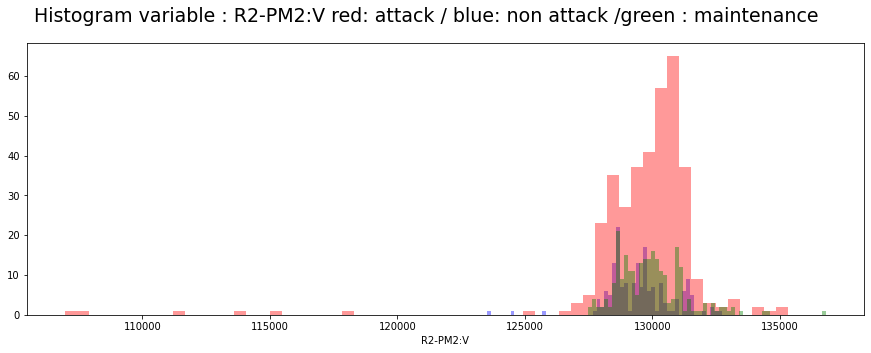

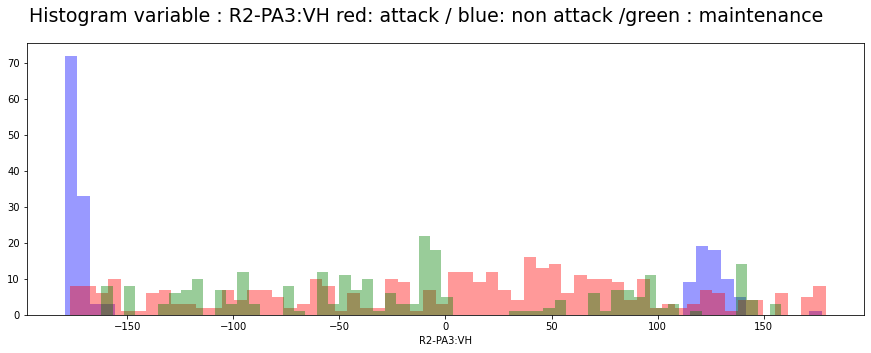

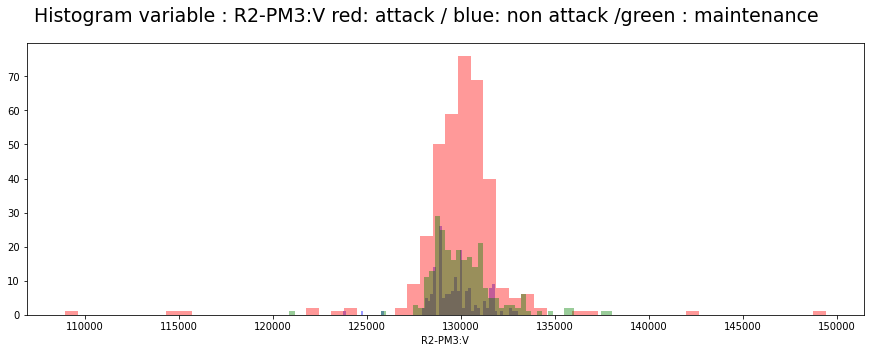

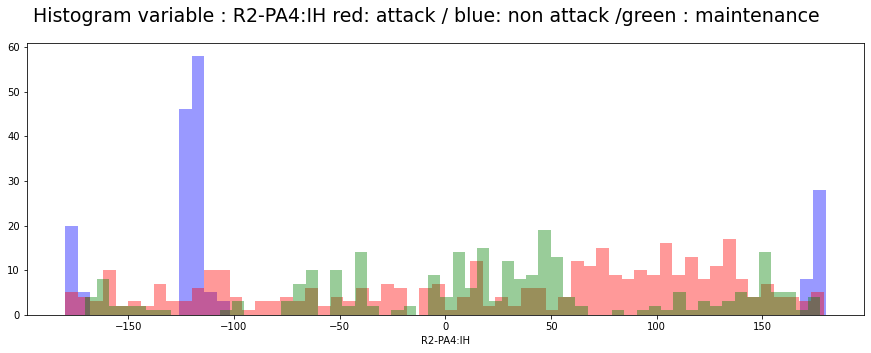

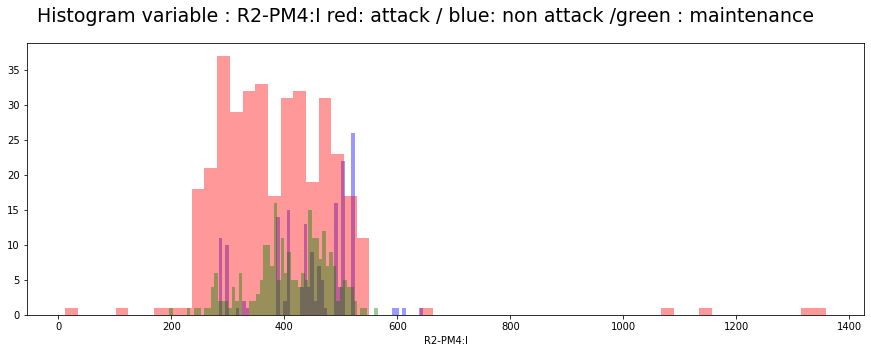

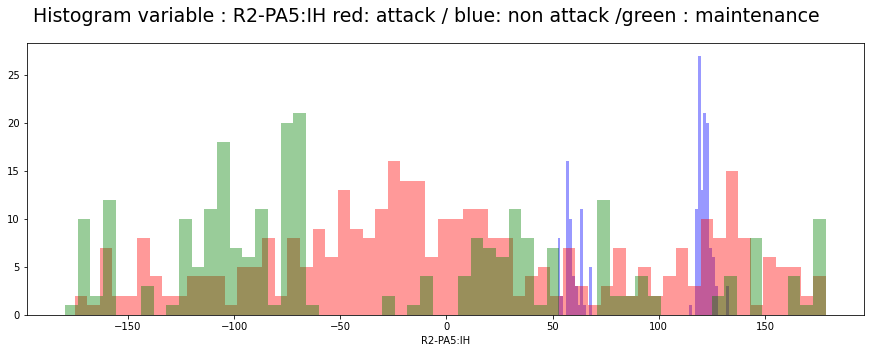

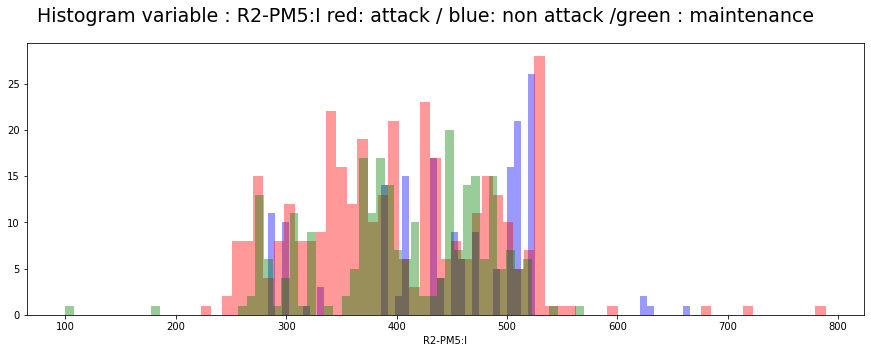

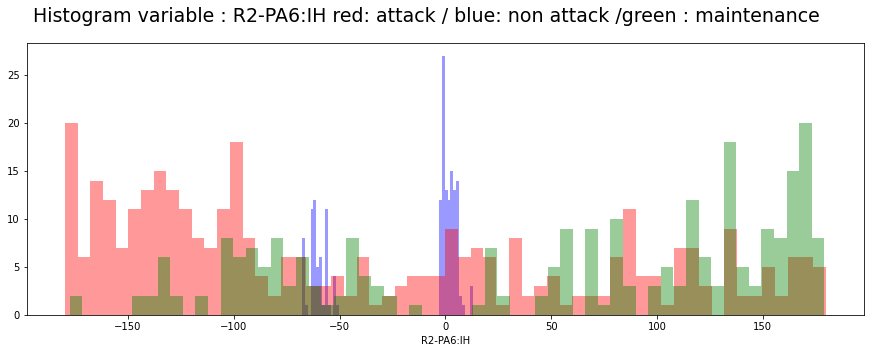

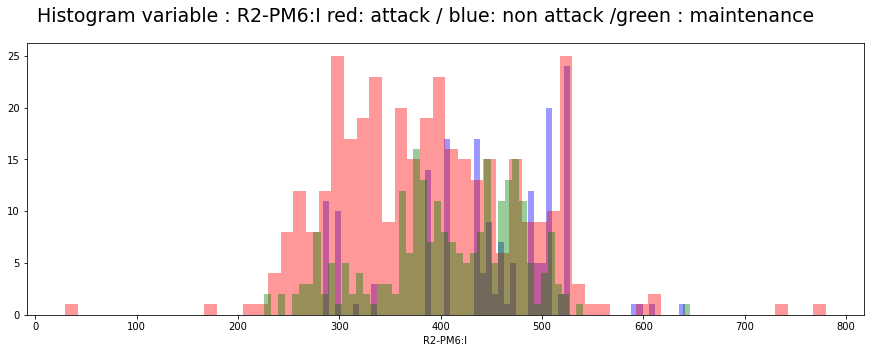

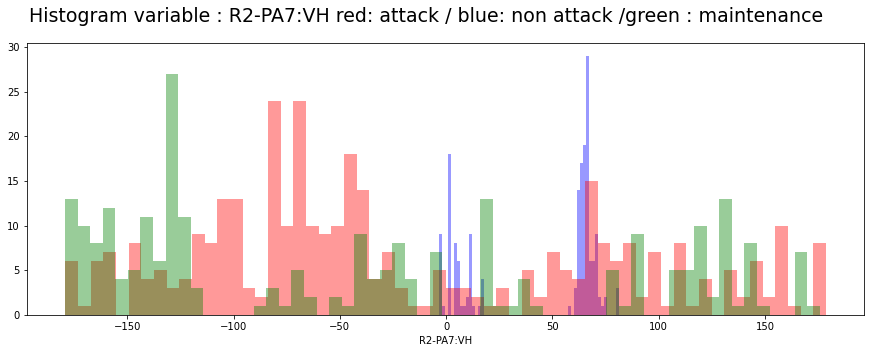

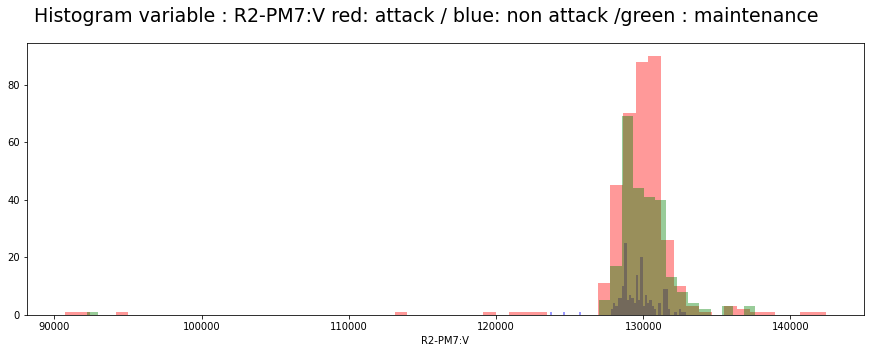

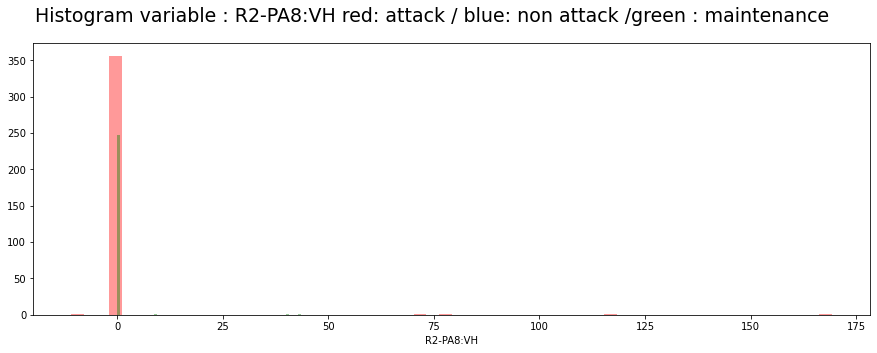

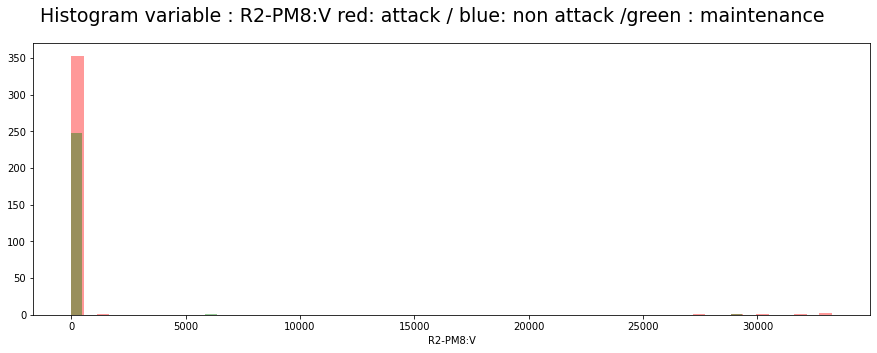

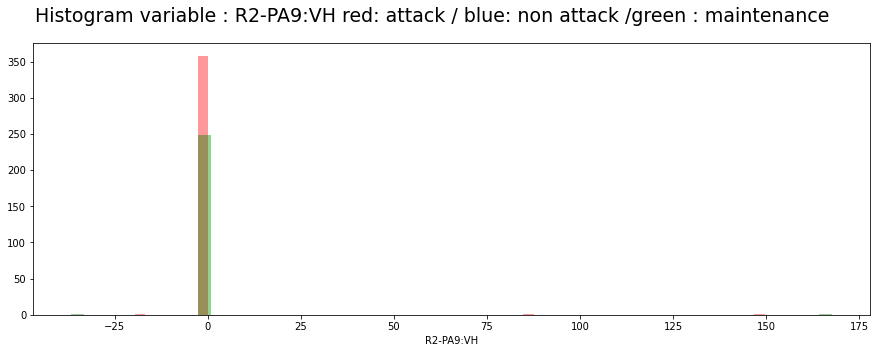

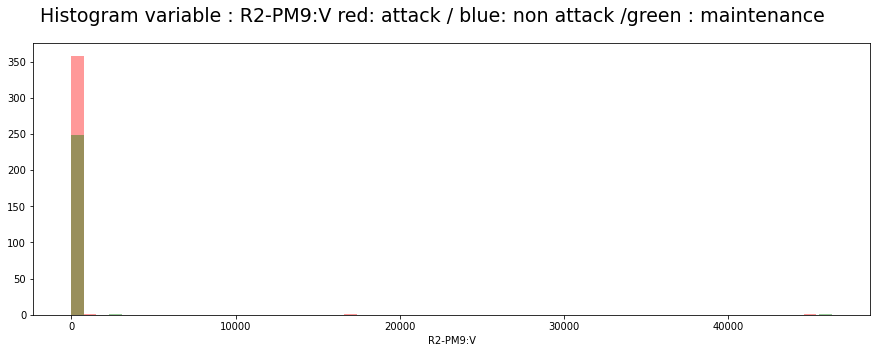

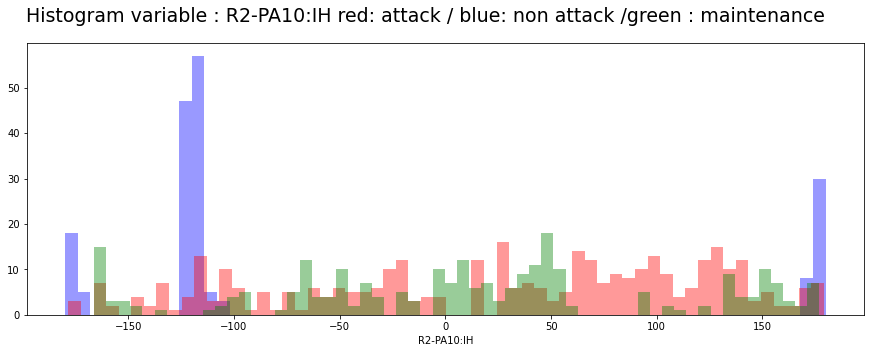

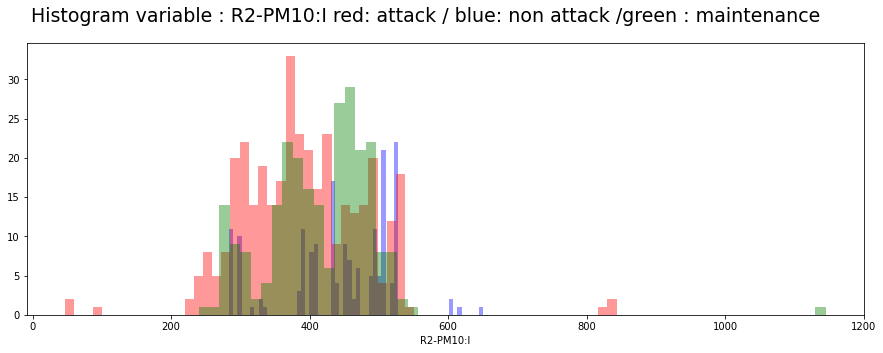

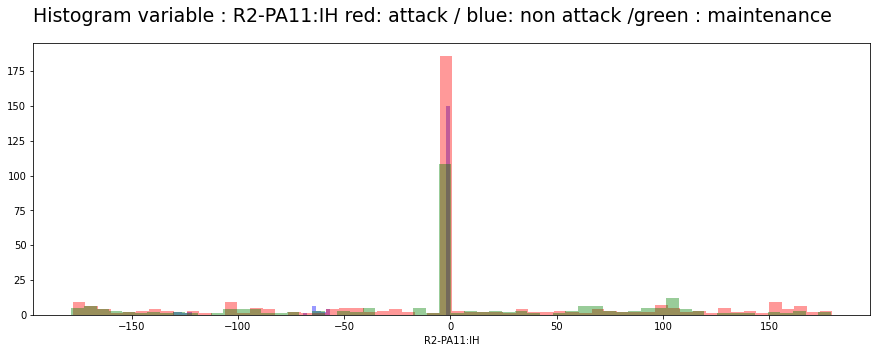

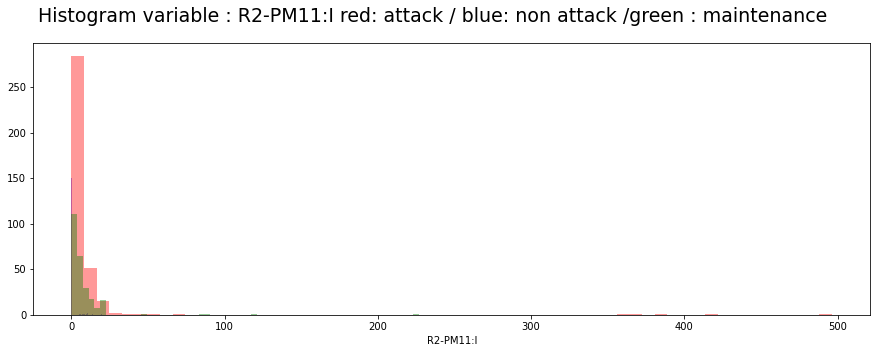

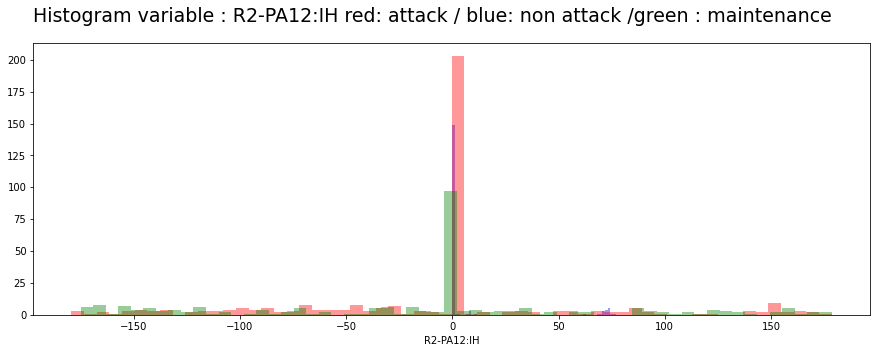

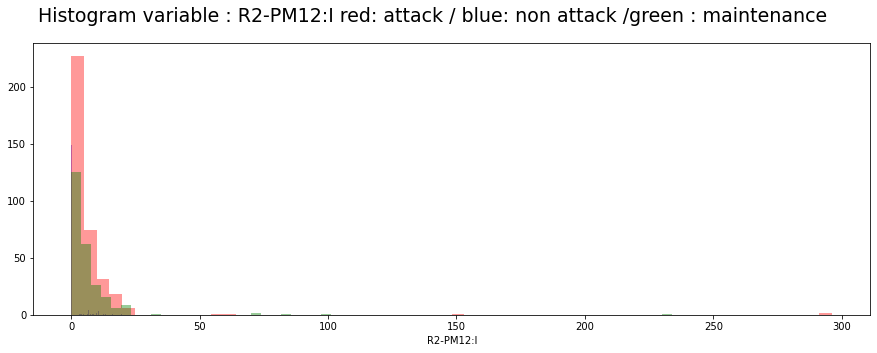

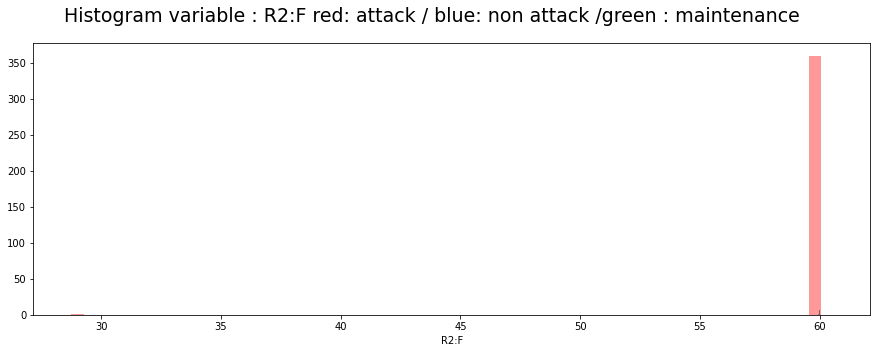

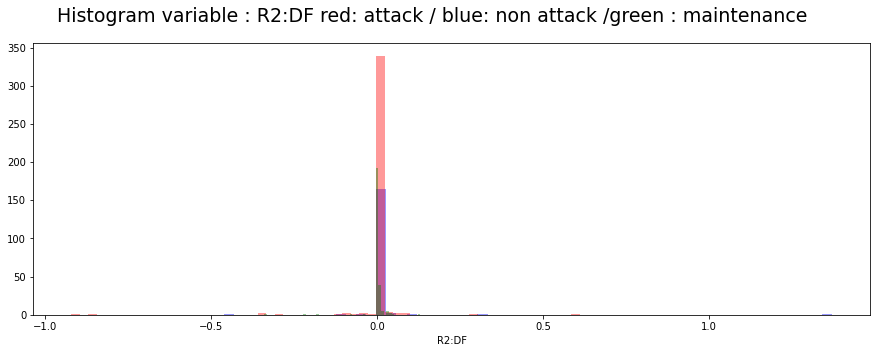

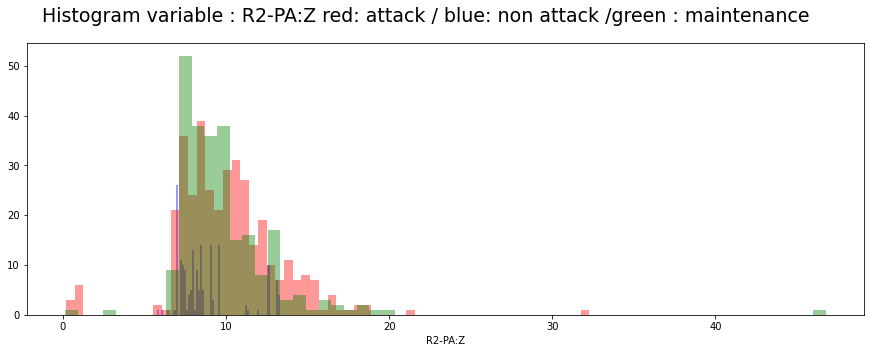

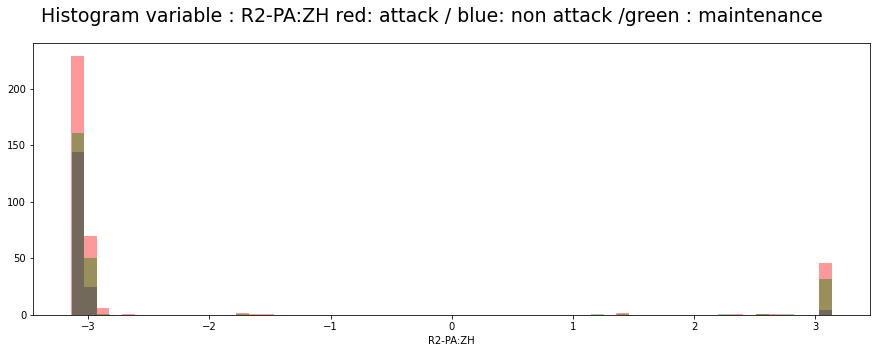

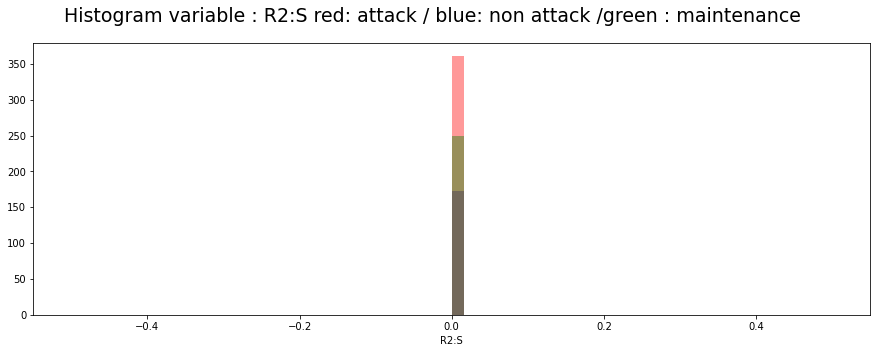

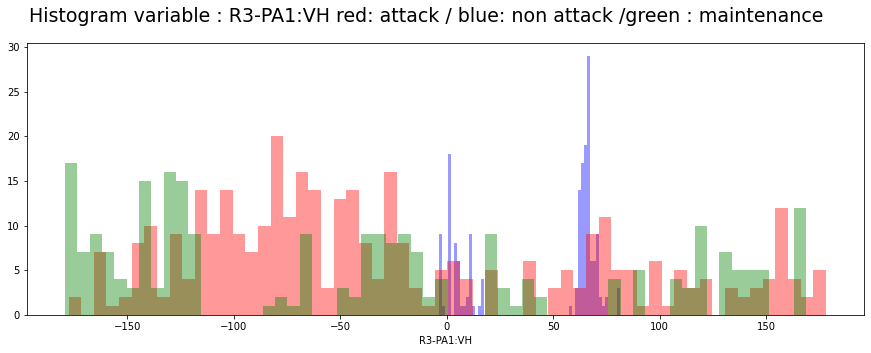

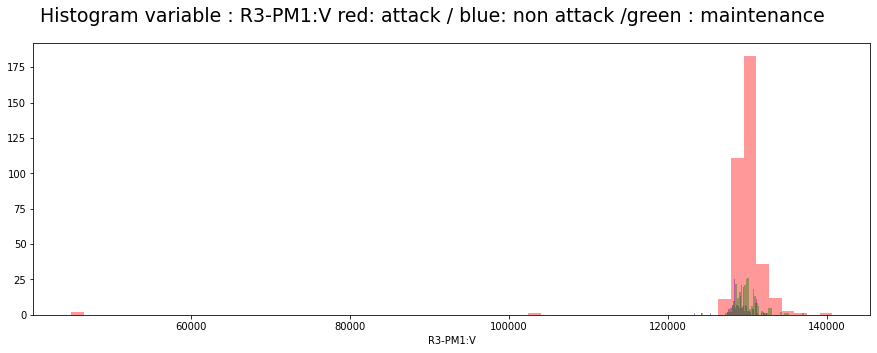

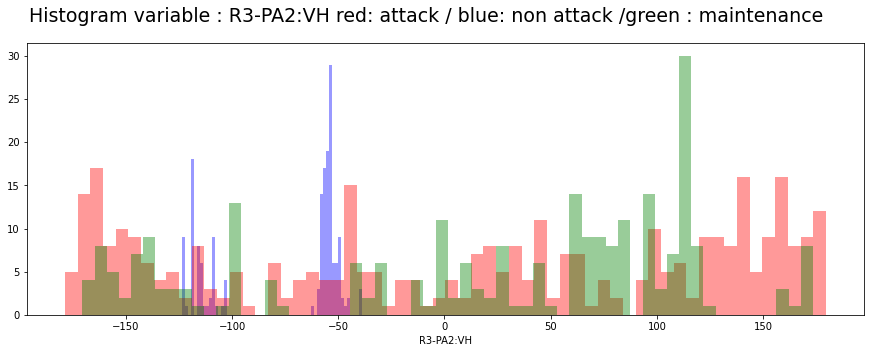

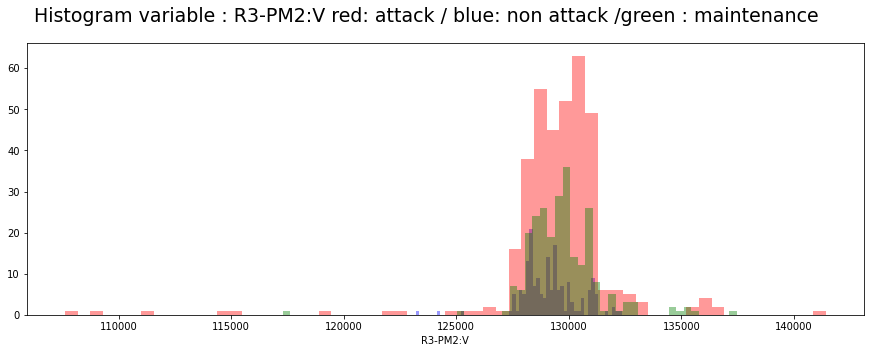

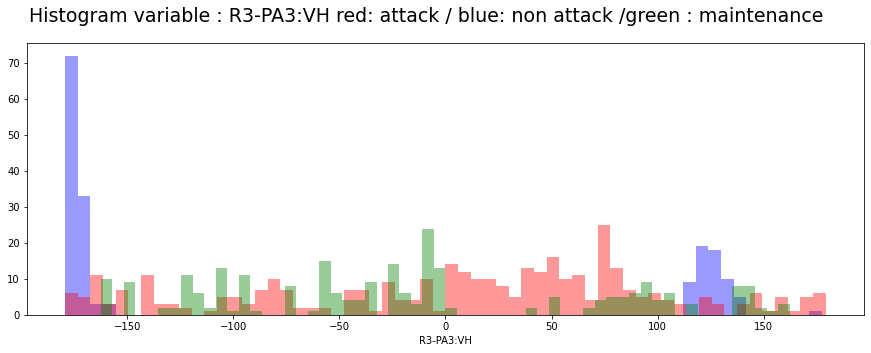

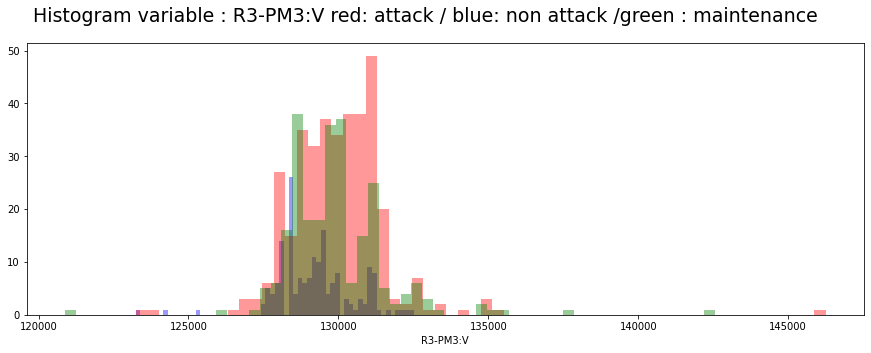

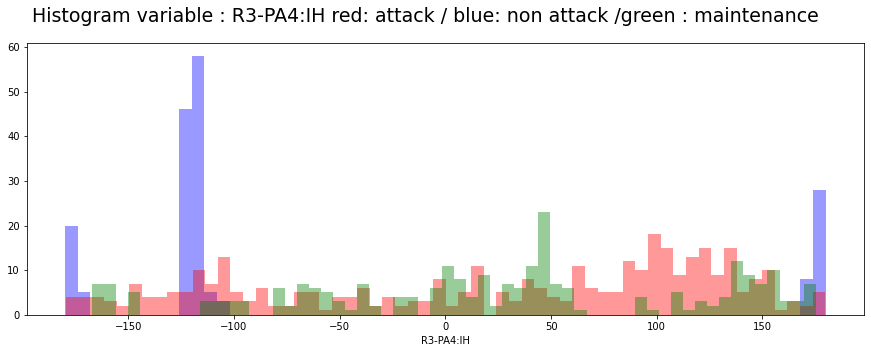

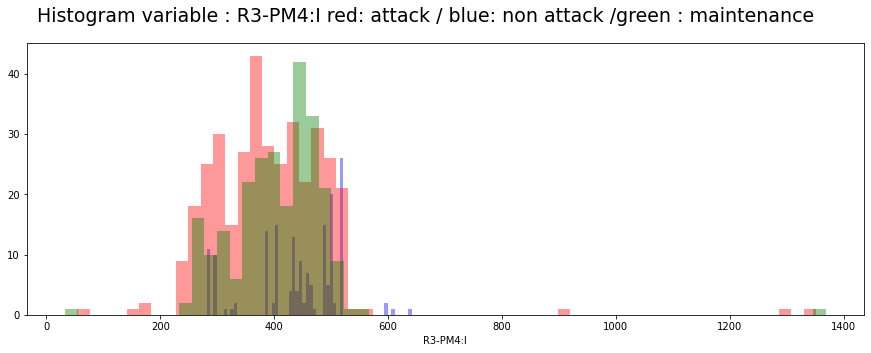

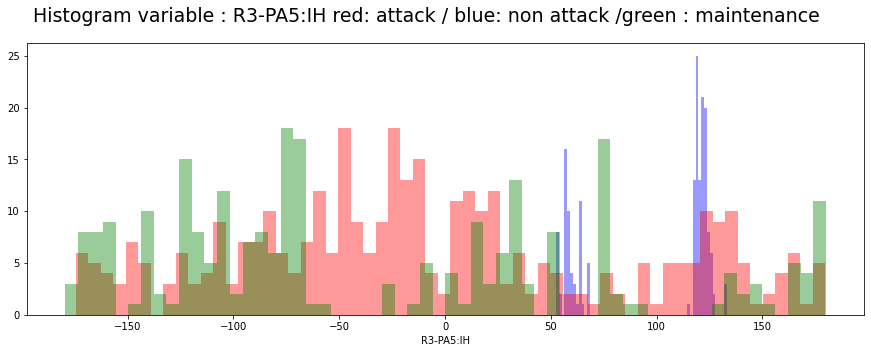

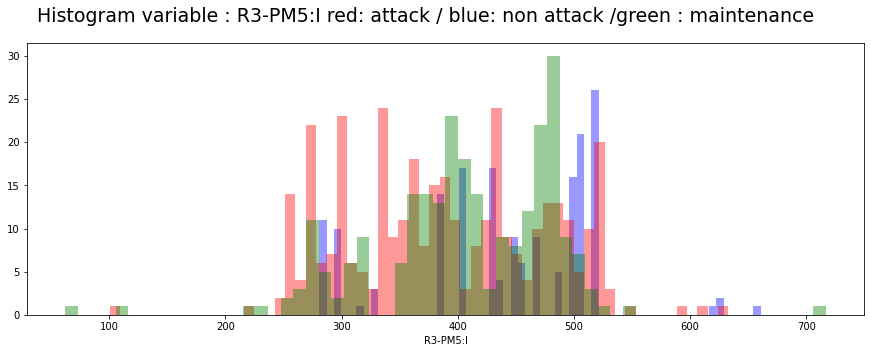

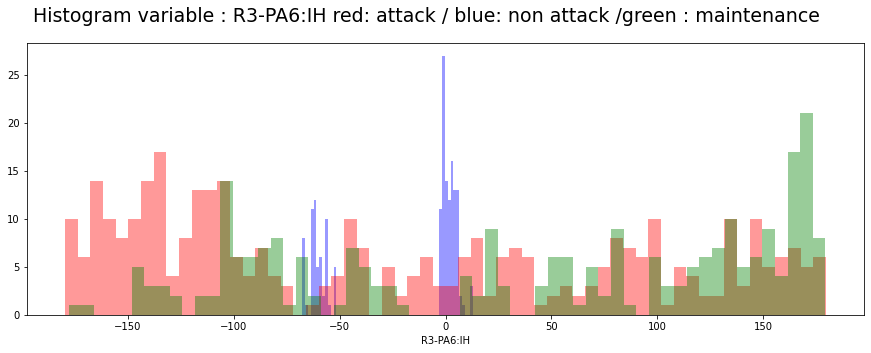

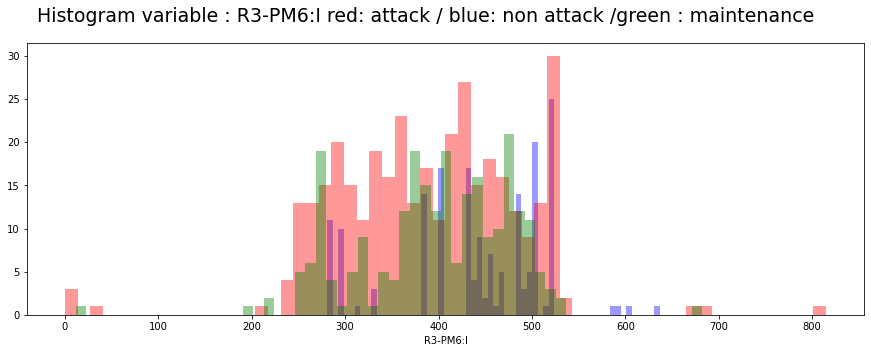

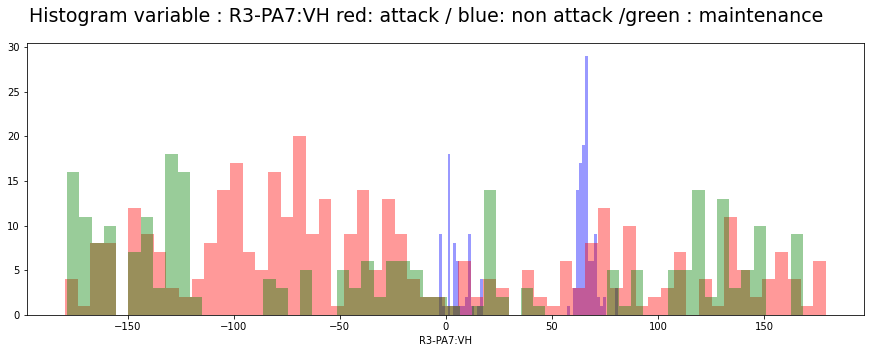

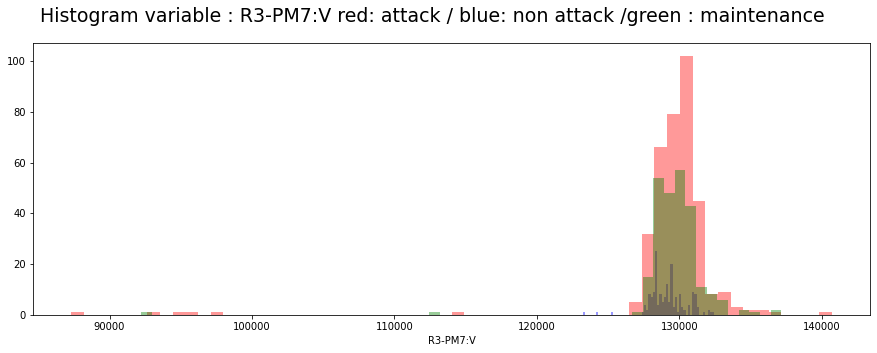

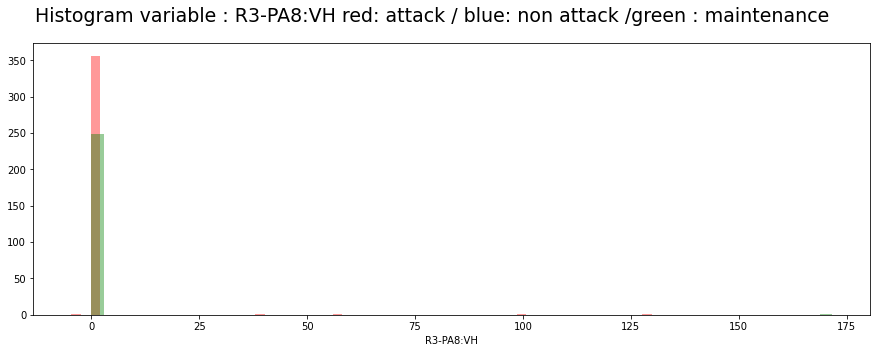

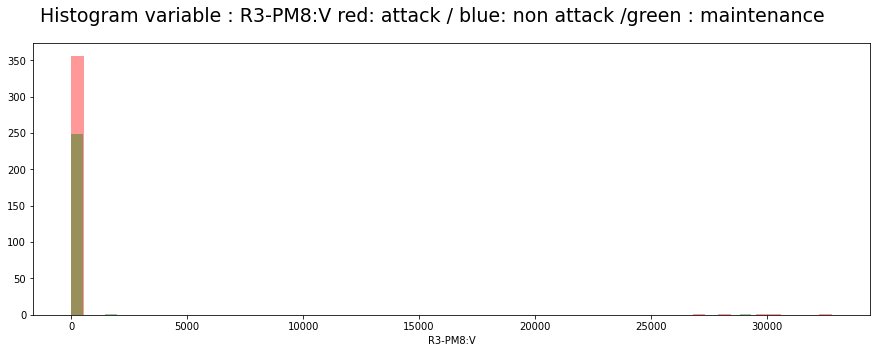

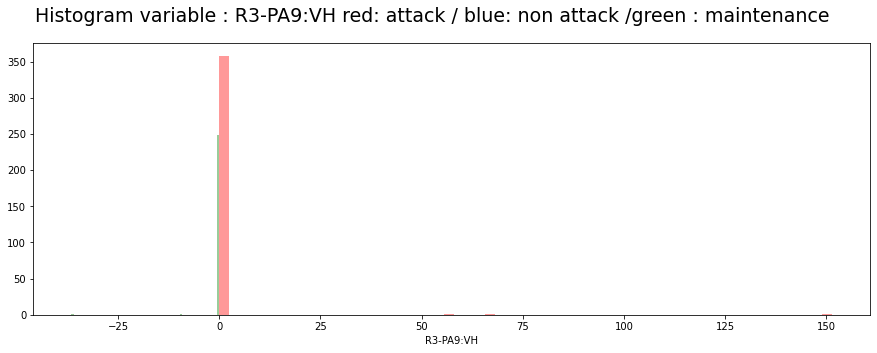

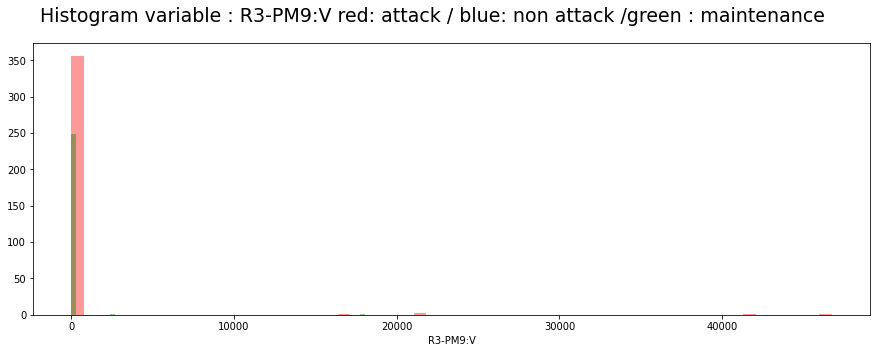

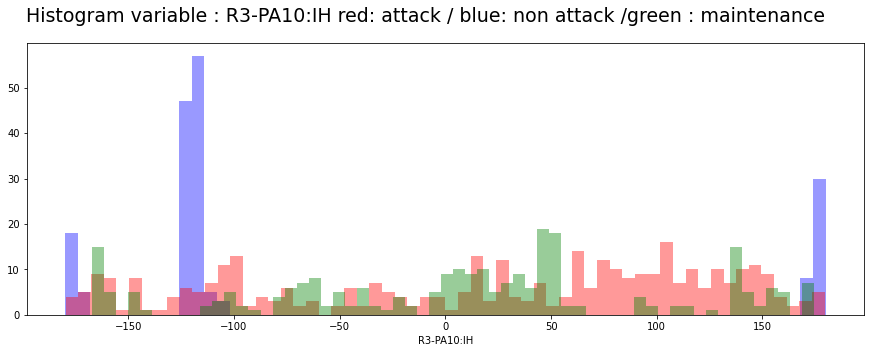

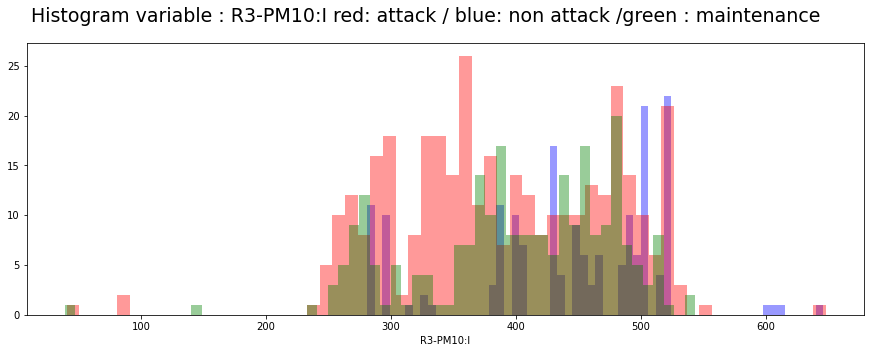

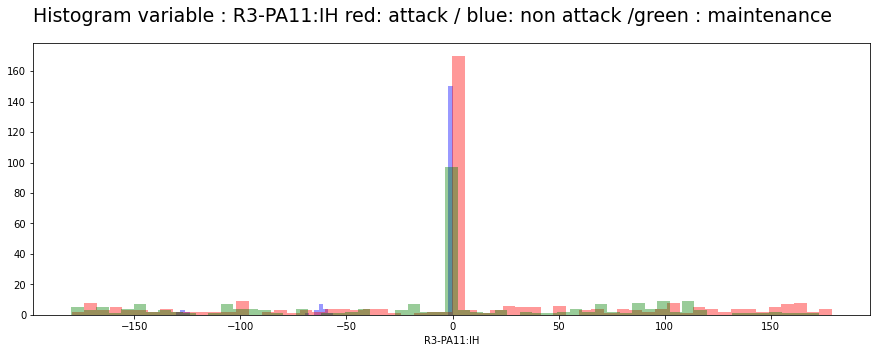

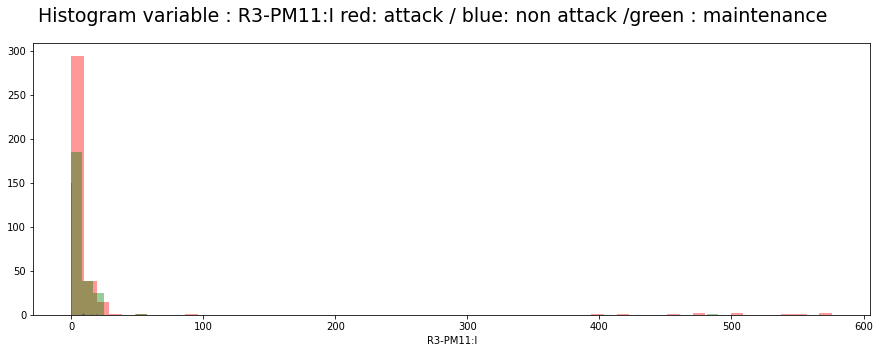

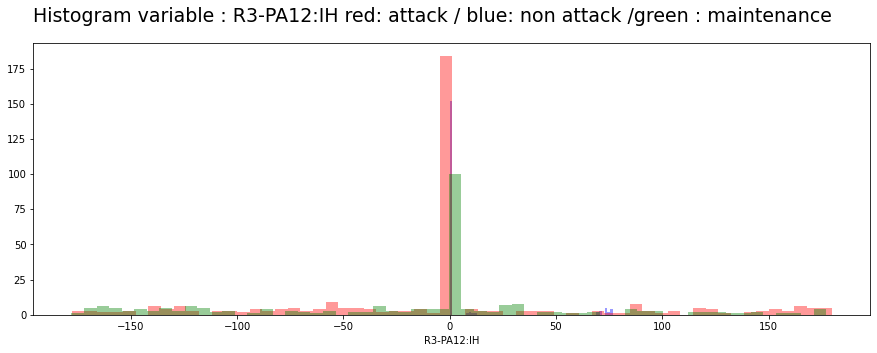

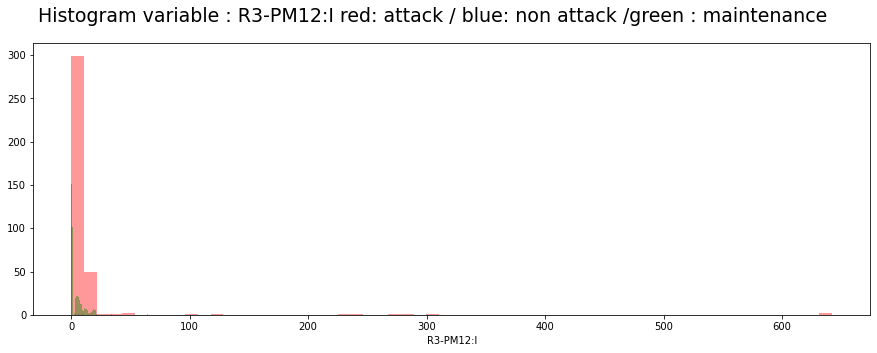

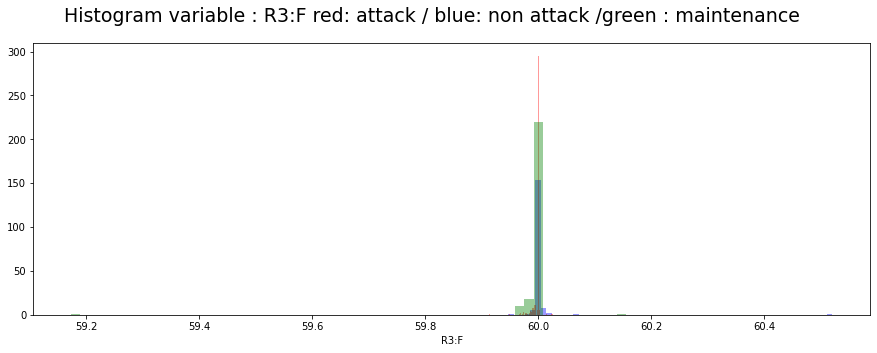

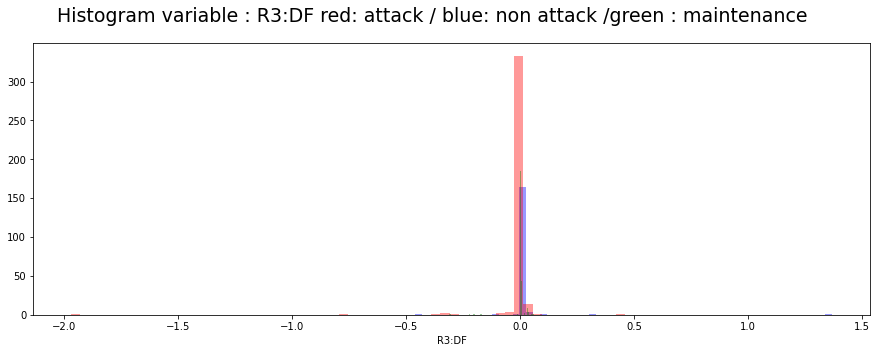

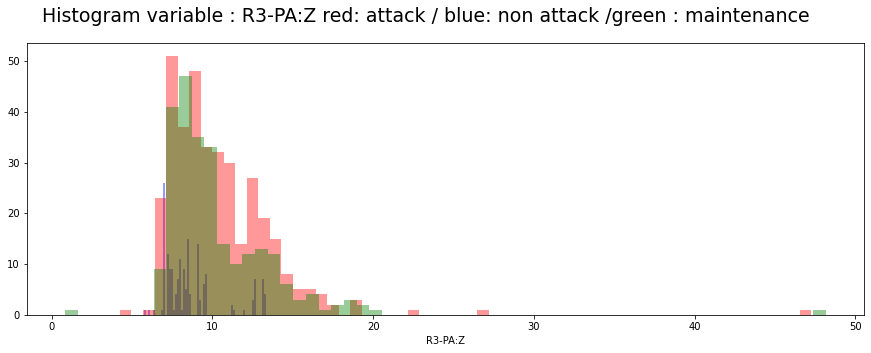

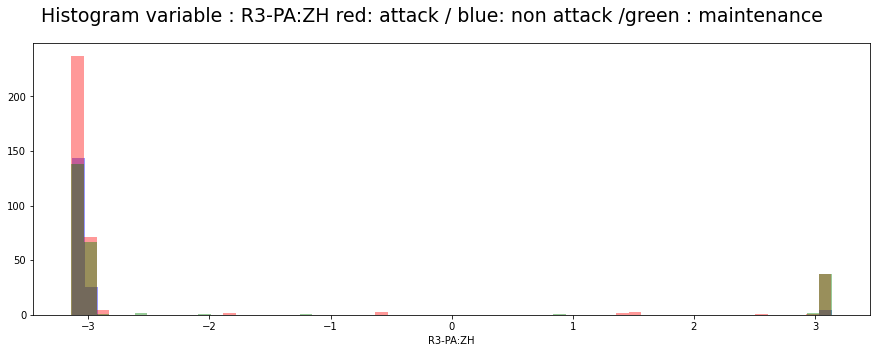

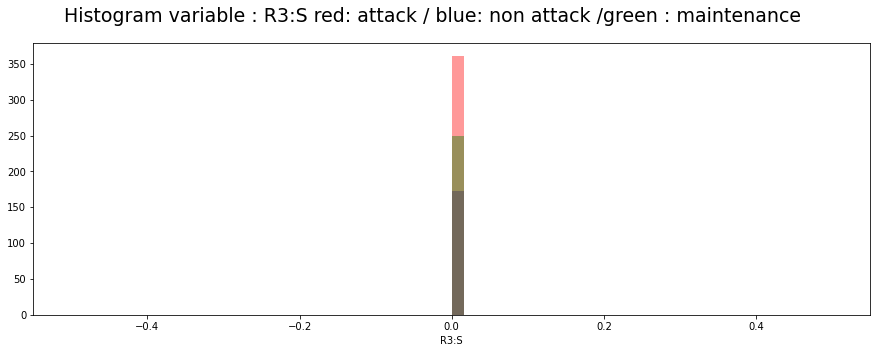

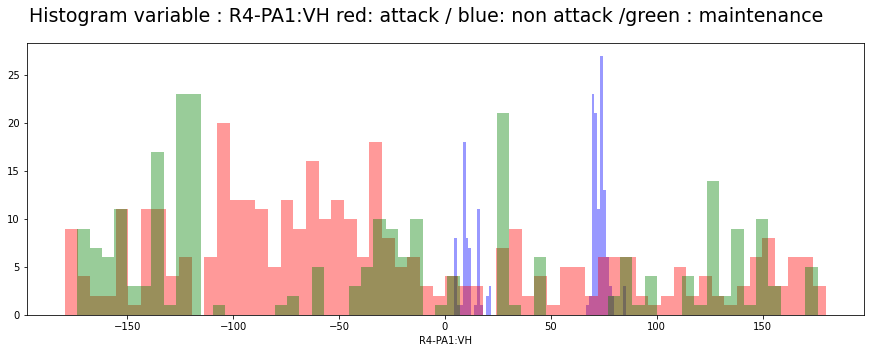

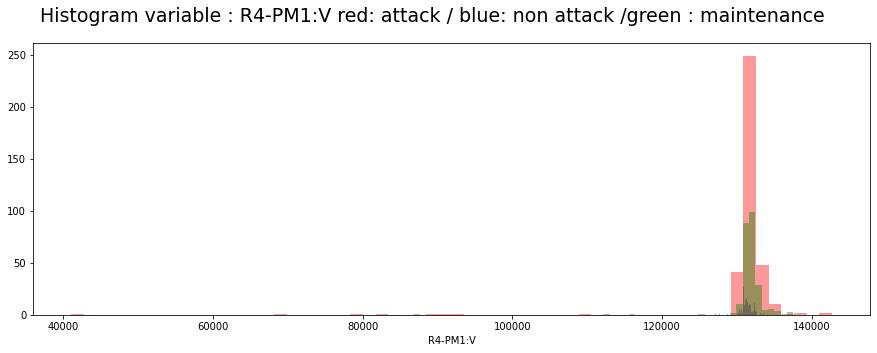

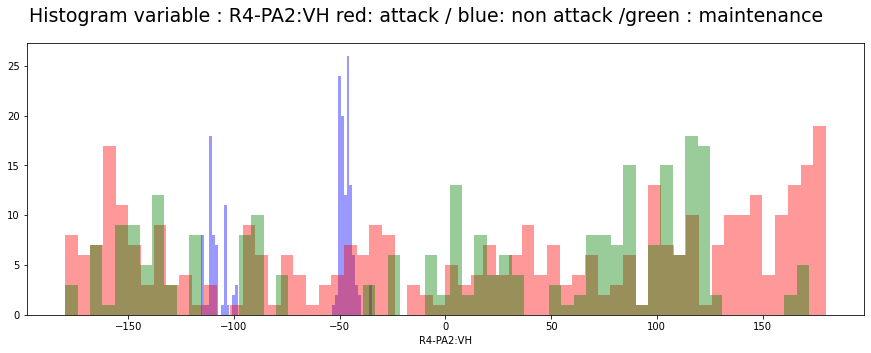

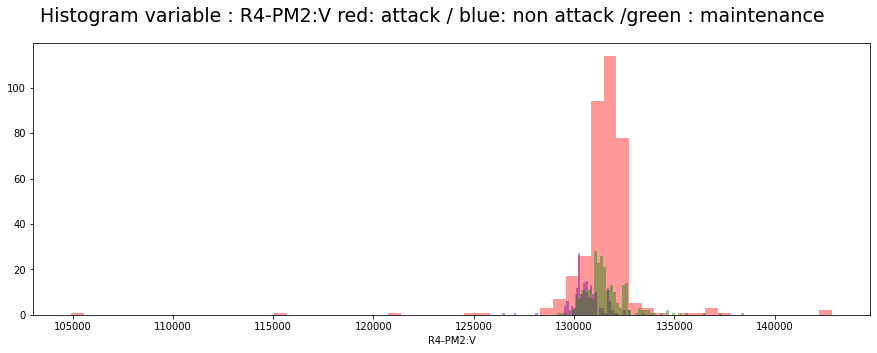

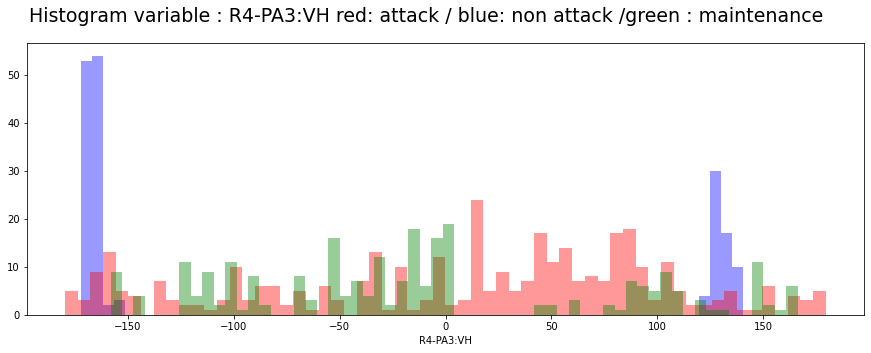

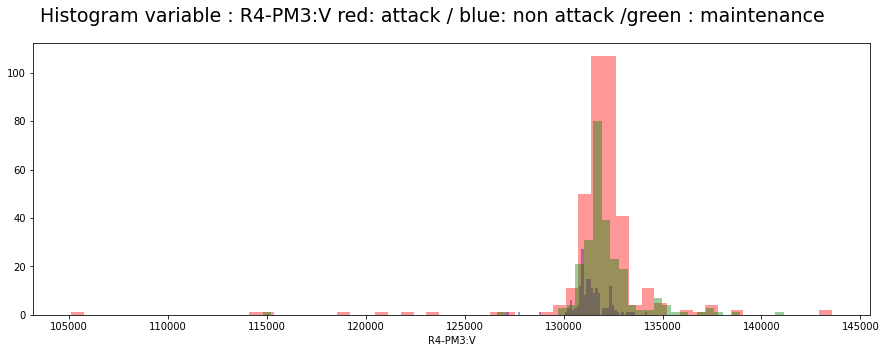

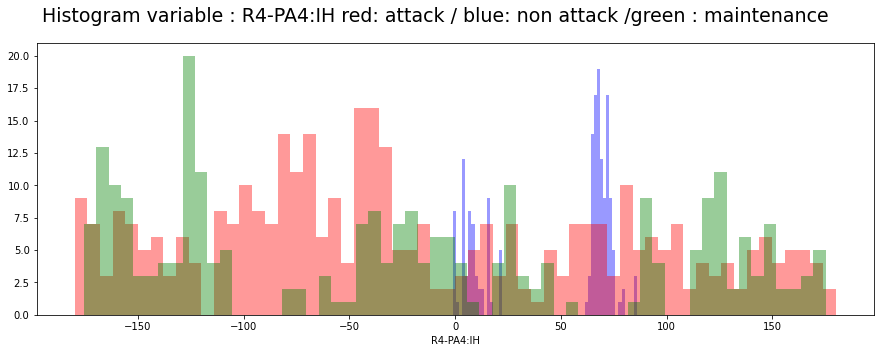

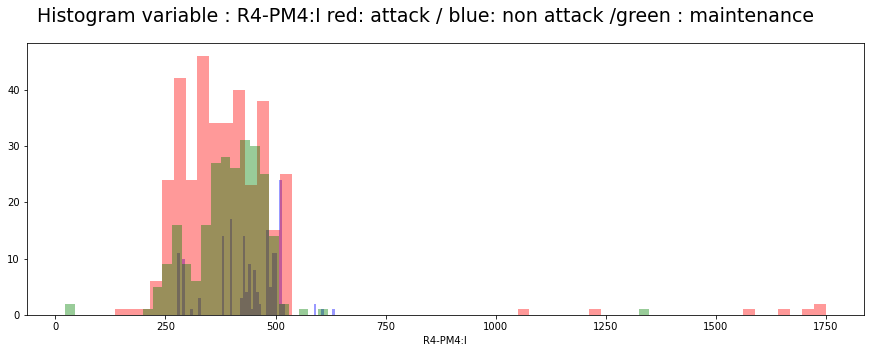

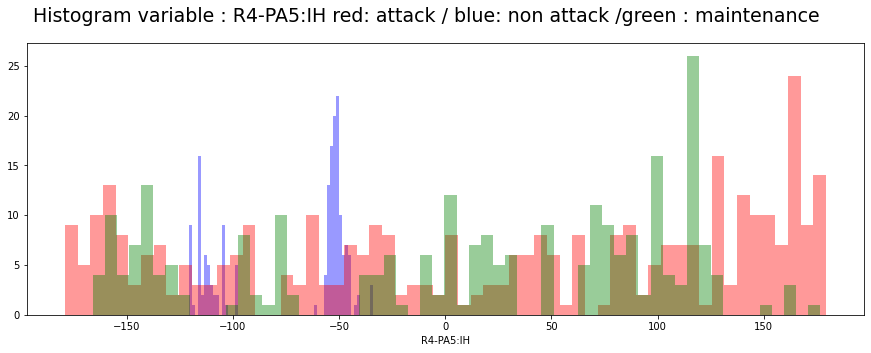

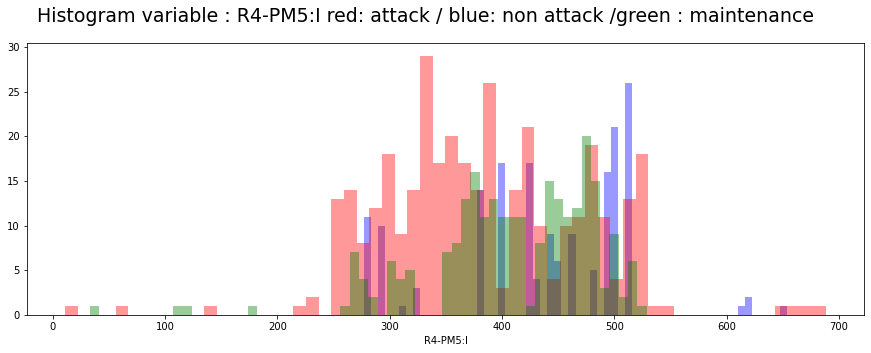

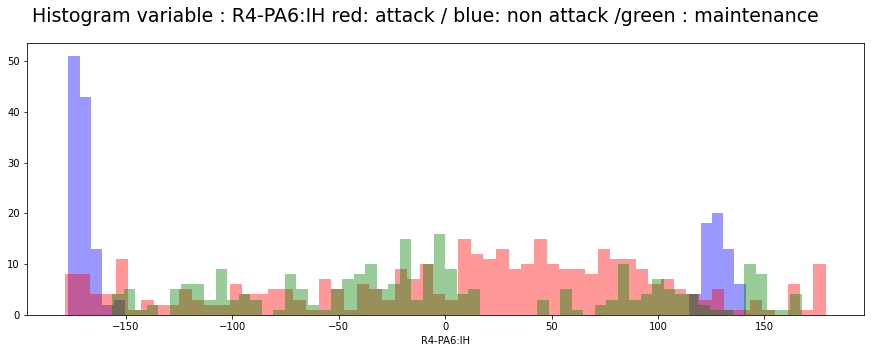

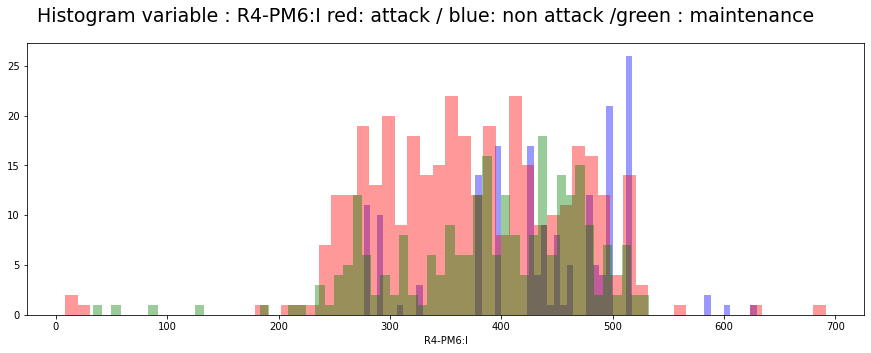

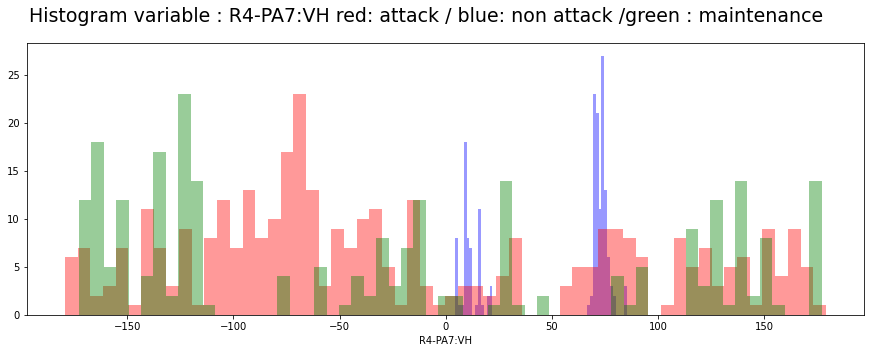

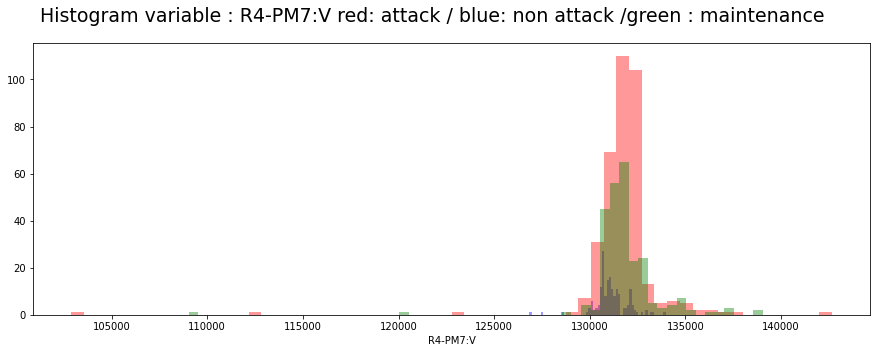

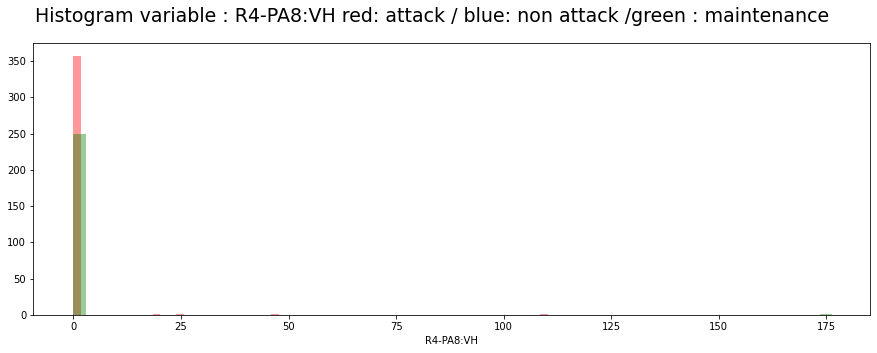

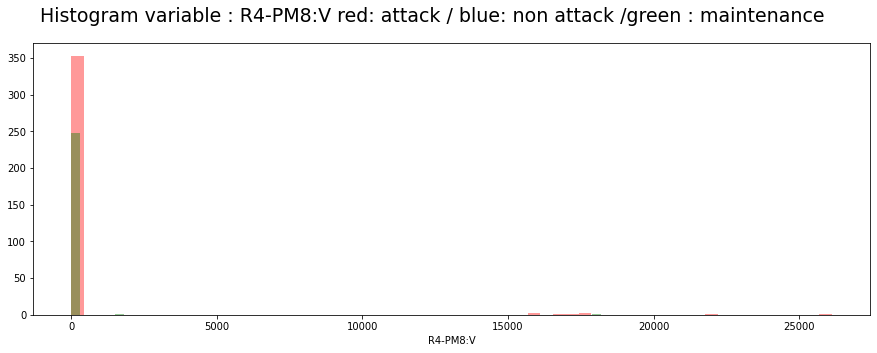

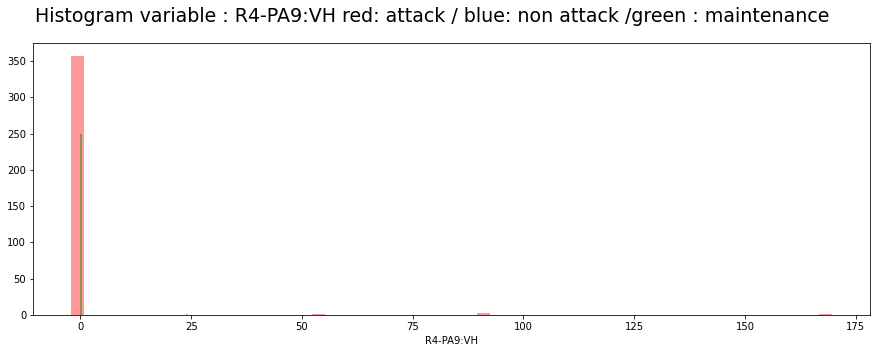

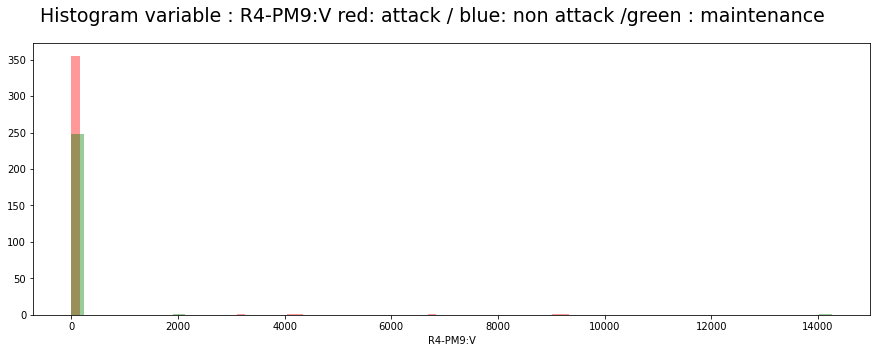

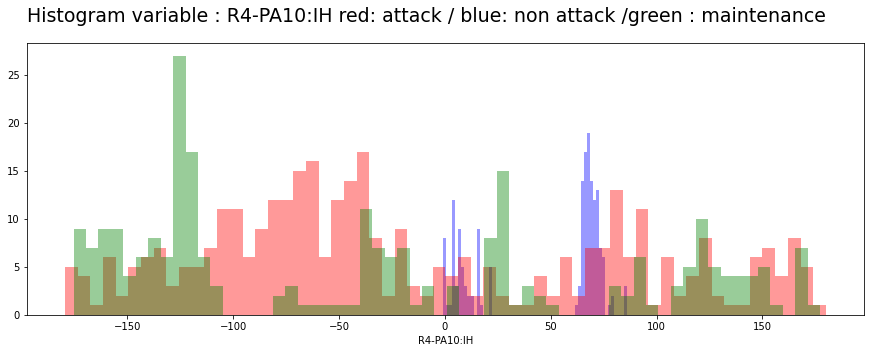

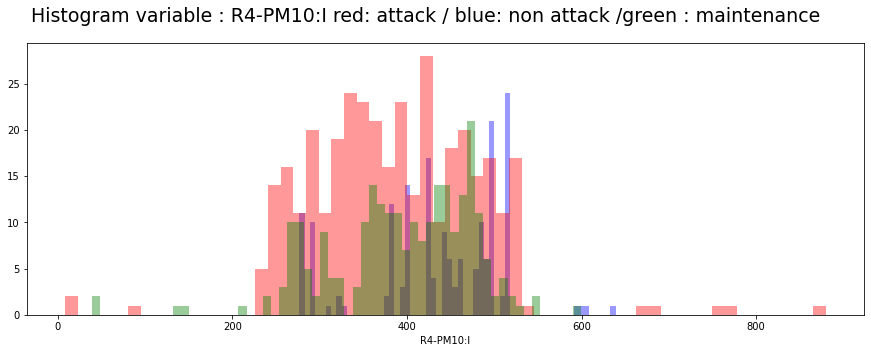

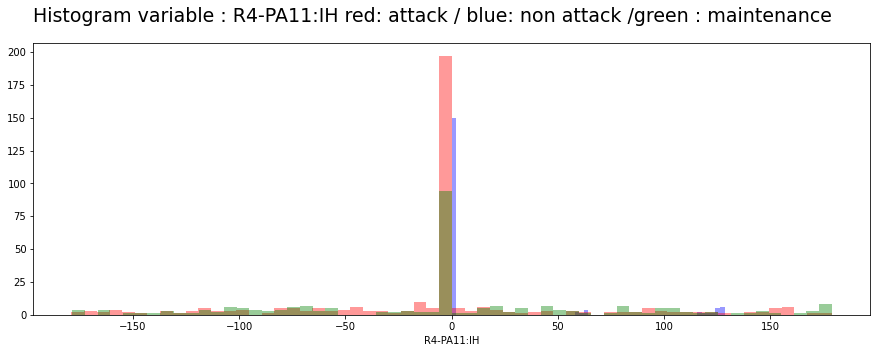

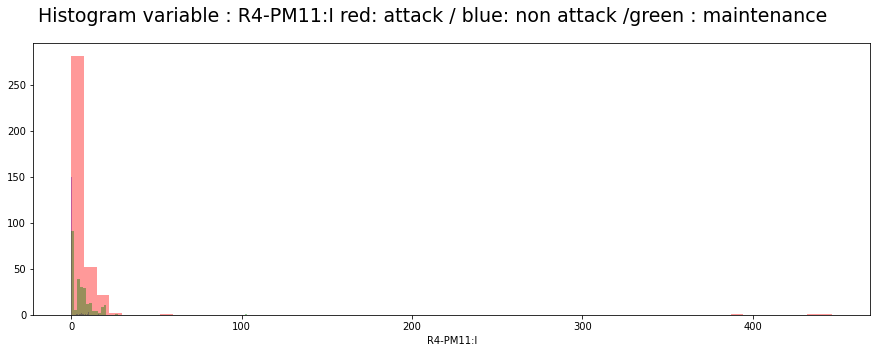

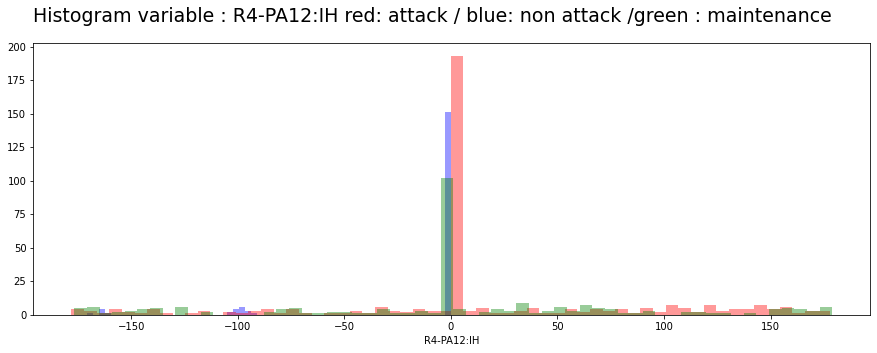

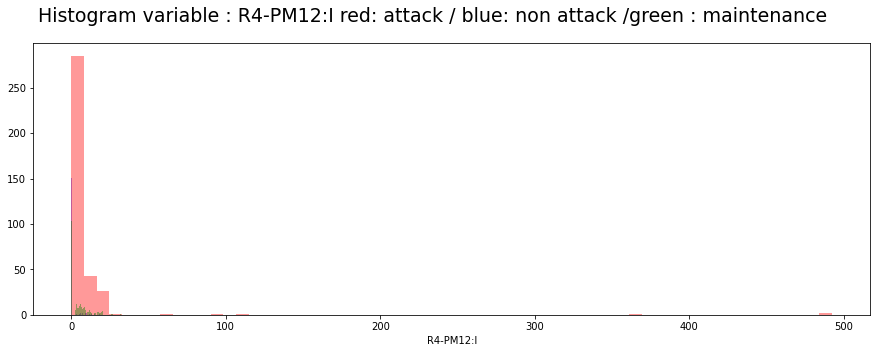

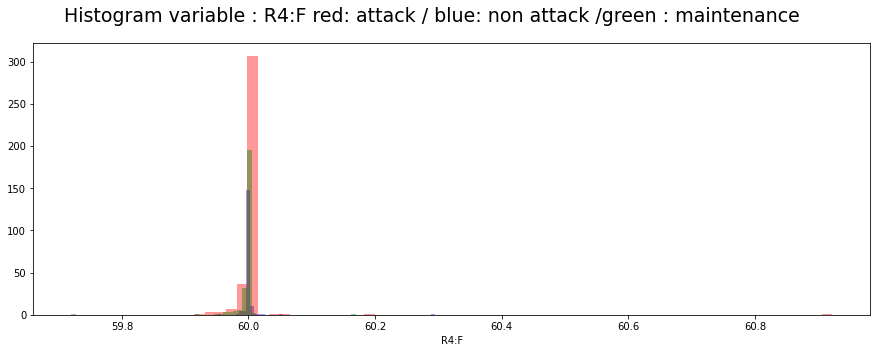

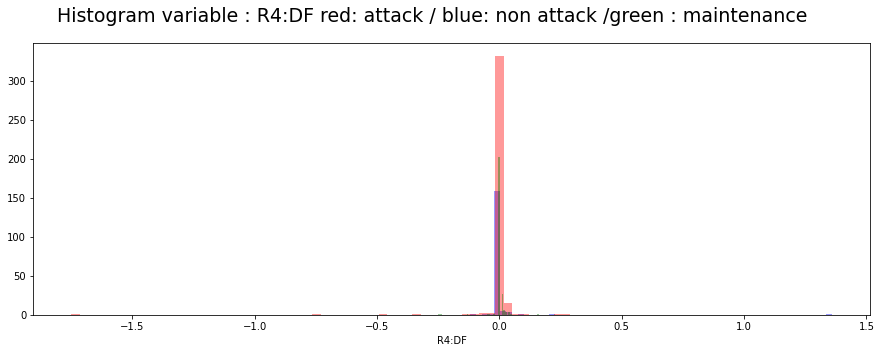

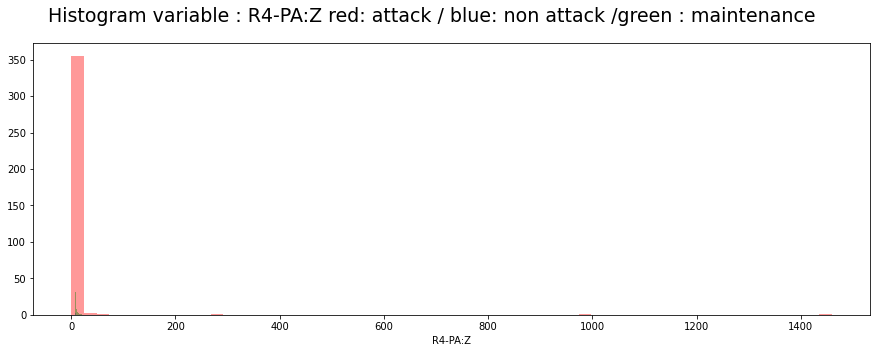

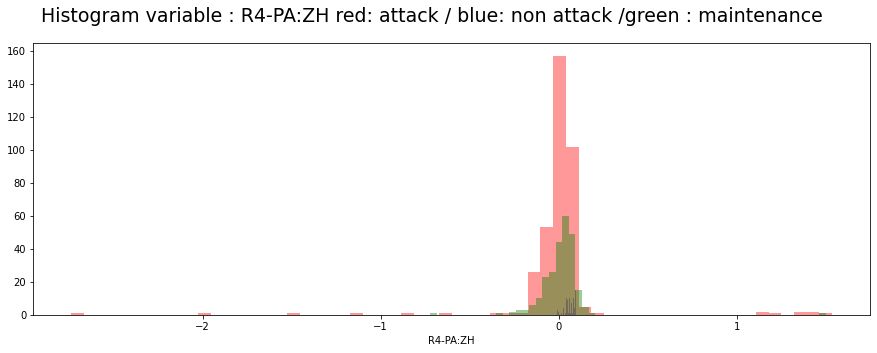

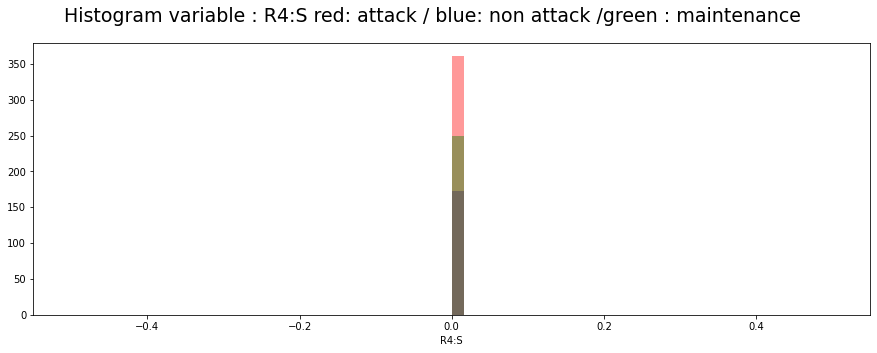

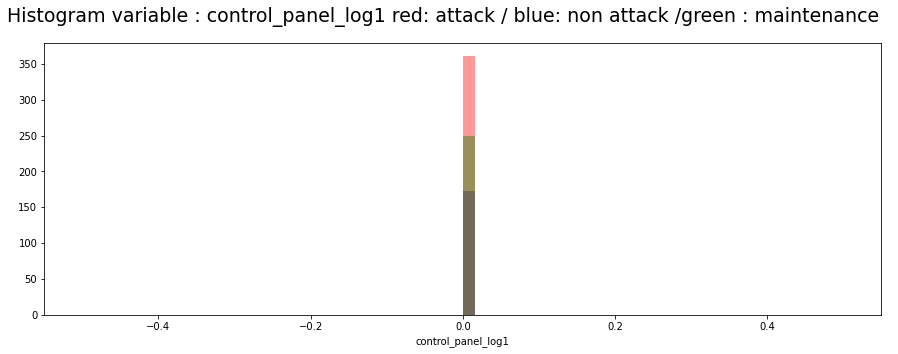

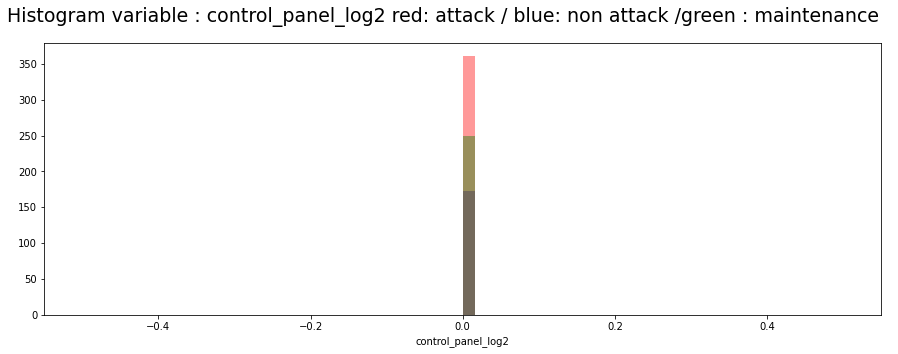

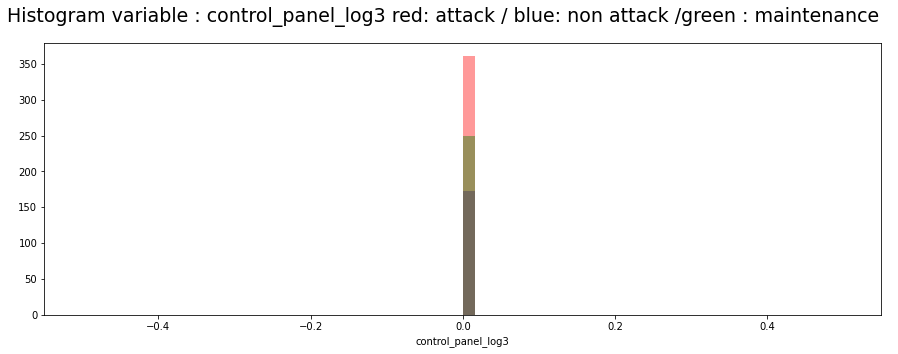

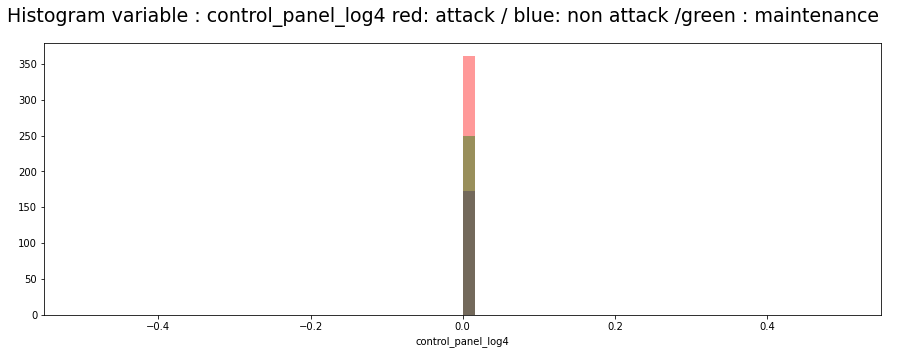

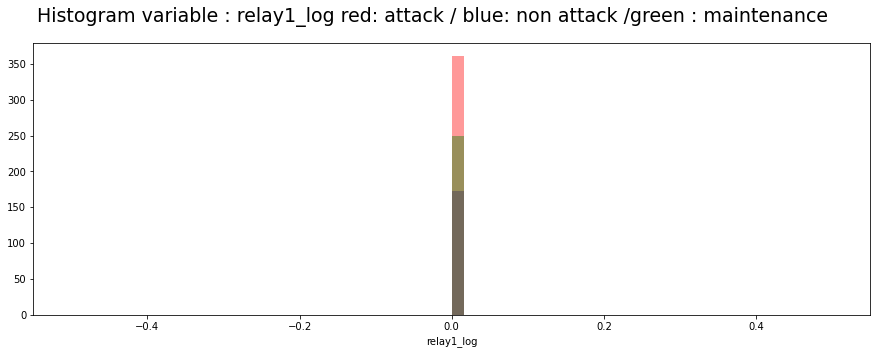

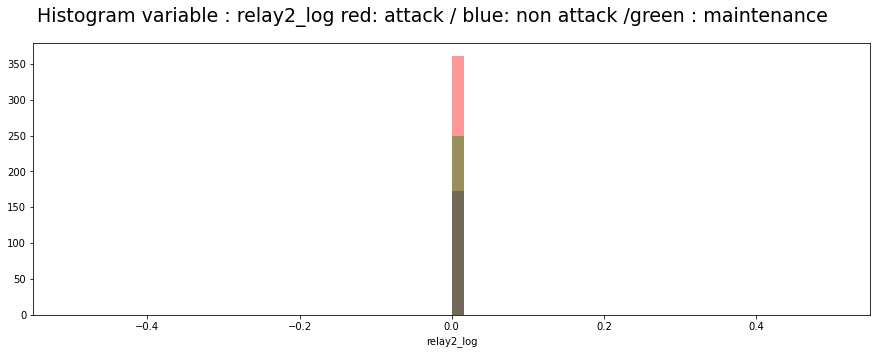

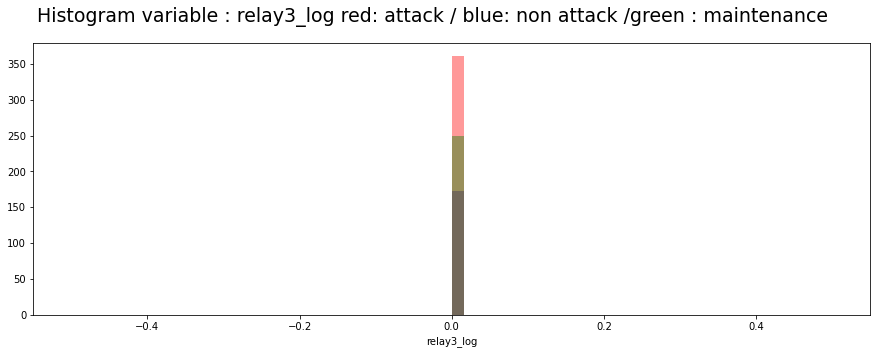

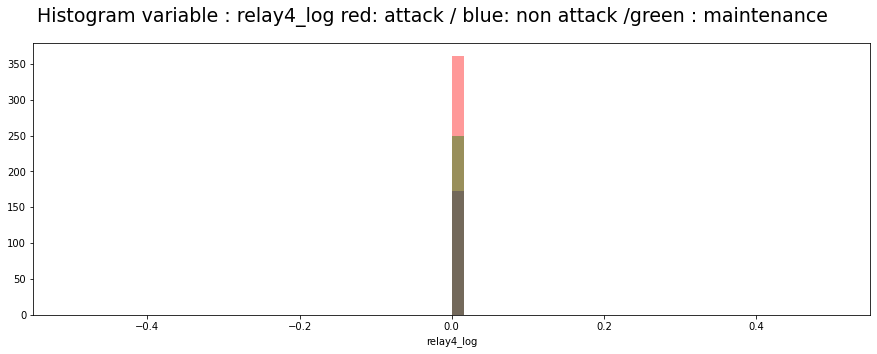

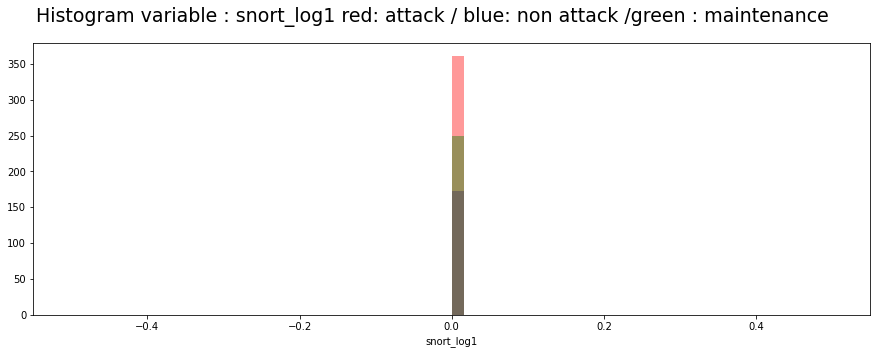

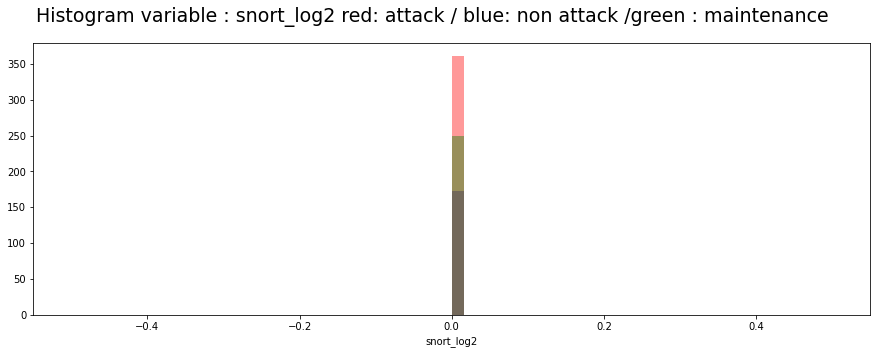

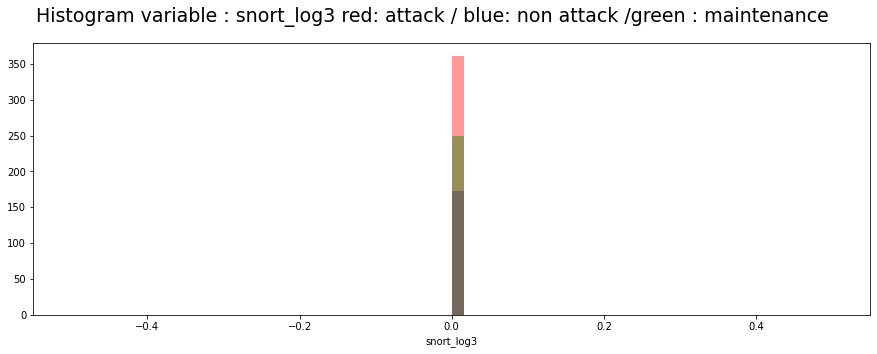

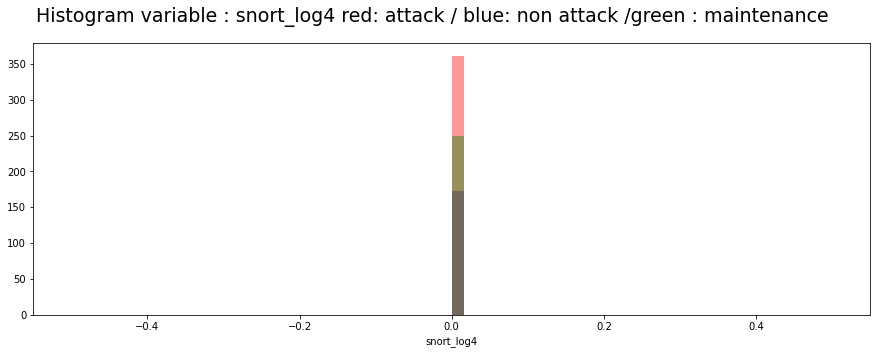

In [68]:
for varname in data_1.columns.values[:-1]:
    

    plt.figure(figsize=(15,5))
    plt.suptitle('Histogram variable : ' + varname + ' red: attack / blue: non attack /green : maintenance  ' ,fontsize=19)
    sns.distplot(data_1[data_1.marker == 0  ][varname],kde=False,bins=60,label='Normal',color='blue')
    sns.distplot(data_1[data_1.marker == 2 ][varname].sample(frac=0.1),kde=False,bins=60,label='attack',color='red')
    sns.distplot(data_1[data_1.marker == 1 ][varname].sample(frac=0.3),kde=False,bins=60,label='maintenance',color='green')

    plt.show()

In [ ]:
#on peut séparer les attaques des non attaques avec plusieurs variables
#aussi, on voit que des variables sont complétement inutiles (snort)

In [18]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
data_1_x = data_1.drop(['marker'],axis=1)

In [21]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [22]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.695555,0.846424,0.362318,0.574286,0.028845,0.612150,0.682602,0.342122,0.341186,0.496015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.704691,0.867921,0.371407,0.633714,0.038014,0.666667,0.699667,0.273056,0.358021,0.396464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.704818,0.868127,0.371534,0.634286,0.038141,0.667186,0.699604,0.273056,0.358117,0.396464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705789,0.870401,0.372521,0.640571,0.039112,0.672897,0.700559,0.272643,0.359439,0.395015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.707094,0.874535,0.373842,0.652000,0.040386,0.683281,0.700463,0.273573,0.360617,0.393856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,0.578411,0.872881,0.245201,0.648000,0.911922,0.679128,0.571087,0.259409,0.233658,0.369512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4962,0.578316,0.873501,0.245090,0.649143,0.911810,0.680685,0.570291,0.260132,0.233467,0.370091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4963,0.577775,0.874328,0.244533,0.652000,0.911285,0.682762,0.567649,0.262200,0.232081,0.371106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4964,0.577695,0.874535,0.244469,0.652000,0.911205,0.682762,0.567490,0.262097,0.231906,0.371251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#visualisation 1 simulation

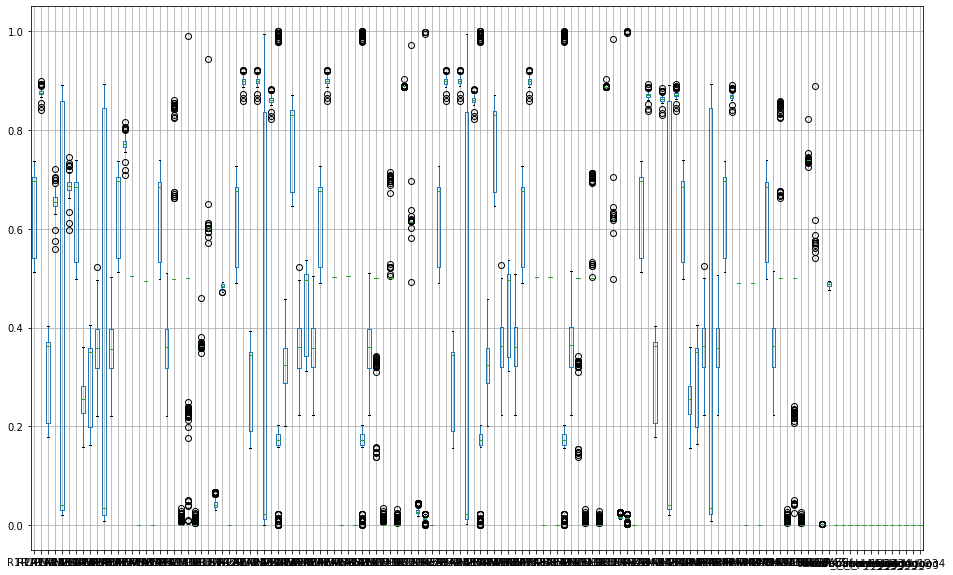

In [23]:
plt.figure(figsize=(16,10))
normal = data_1[data_1['marker']==0].drop(['marker'],axis=1)
normal.boxplot( )
# pas attaque


#

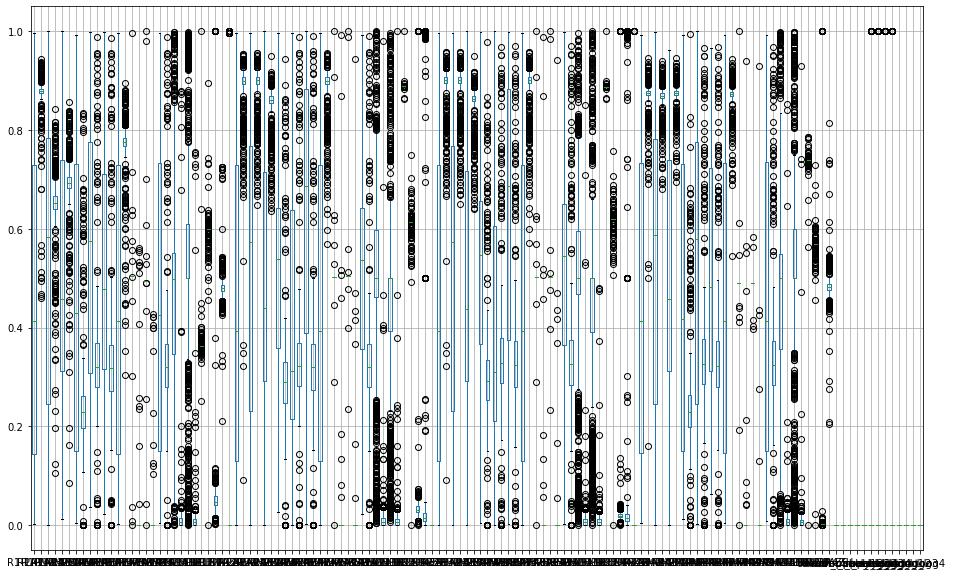

In [24]:
plt.figure(figsize=(16,10))
normal = data_1[data_1['marker']==1].drop(['marker'],axis=1)
normal.boxplot( )
#maintenance

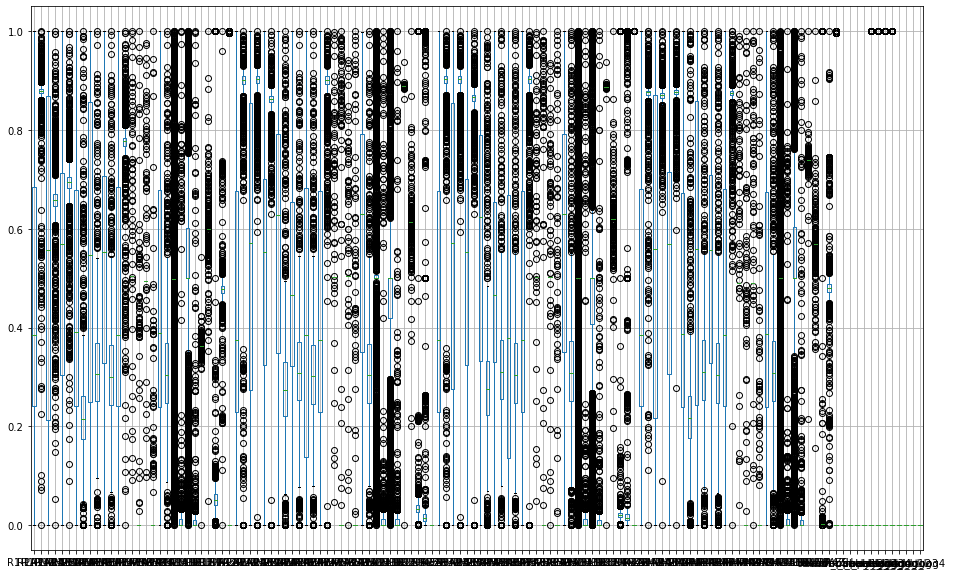

In [25]:
plt.figure(figsize=(16,10))
normal = data_1[data_1['marker']==2].drop(['marker'],axis=1)
normal.boxplot( )
#attaque

In [ ]:
#il est difficile d'observer grand chose, je ne pense pas que minMaxScaler soit le scaler le plus adapté aux 
# outliers

In [57]:
#############################################################################################
#essayons avec un autre scaler :


#on reload

#mais cette fois ci, on utilise tous les datasets
data_1 = pd.read_csv("data1.csv")
for dataseti in range(2,16):
    data_1 = pd.concat([data_1,  pd.read_csv("data"+str(dataseti)+".csv")],ignore_index = True)
data_1 = data_1.replace({'Attack': 2, 'Natural': 1,'NoEvents':0})
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution = "normal")
data_1_x = data_1.drop(['marker'],axis=1)
data_1[data_1.columns.values[:-1]] = scaler.fit_transform(data_1_x)

In [42]:
print(pd.Series(data_1['marker']).value_counts())

2    55663
1    18309
0     4405
Name: marker, dtype: int64


In [43]:
# les non attaques ne sont pas nombreux 

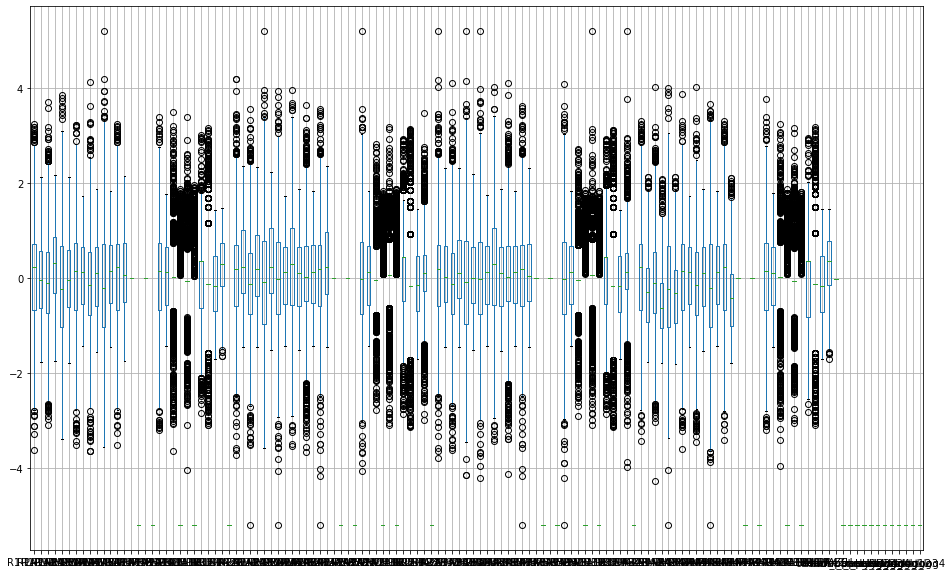

In [44]:
plt.figure(figsize=(16,10))
normal = data_1[data_1['marker']==0].drop(['marker'],axis=1)
normal.boxplot( )
#pas attaque

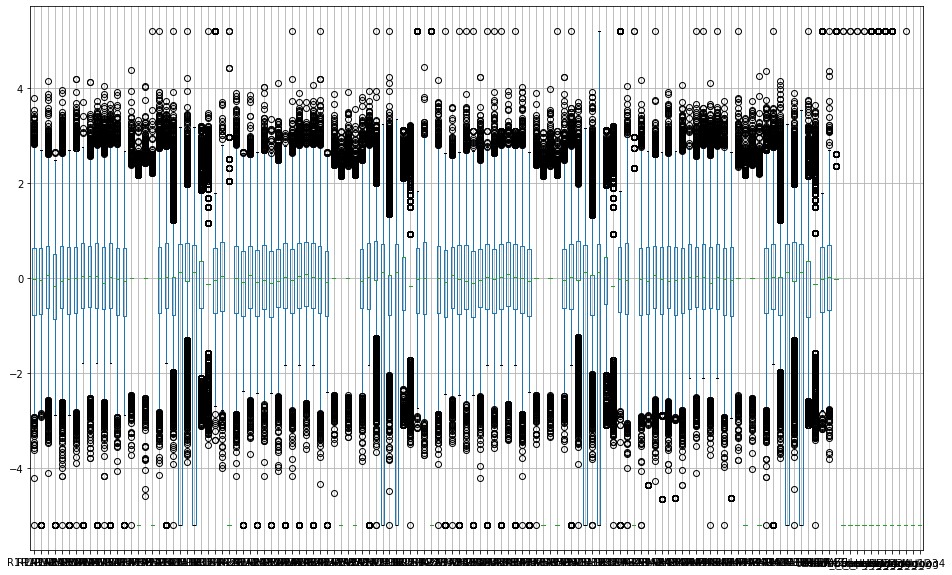

In [45]:
plt.figure(figsize=(16,10))
normal = data_1[data_1['marker']==1].drop(['marker'],axis=1)
normal.boxplot( )
#maintenance

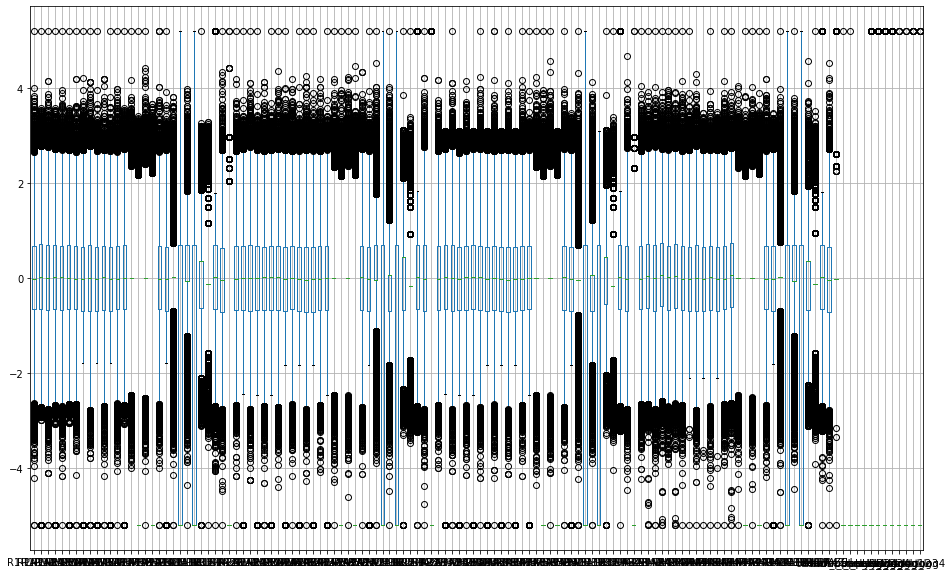

In [46]:
plt.figure(figsize=(16,10))
normal = data_1[data_1['marker']==2].drop(['marker'],axis=1)
normal.boxplot( )
#attaque

In [47]:
#explication

#on a vu plus haut que les attaques sont disponibles en plus grand nombre, 
#alors, il parait normal que la répartition des valeurs non-attaque ne suivent pas "à priori" une distribution normale

# en revanche, on voit bien que dans ce dataset, les outliers sont présents en nombre !
# cela pose évidement un problème



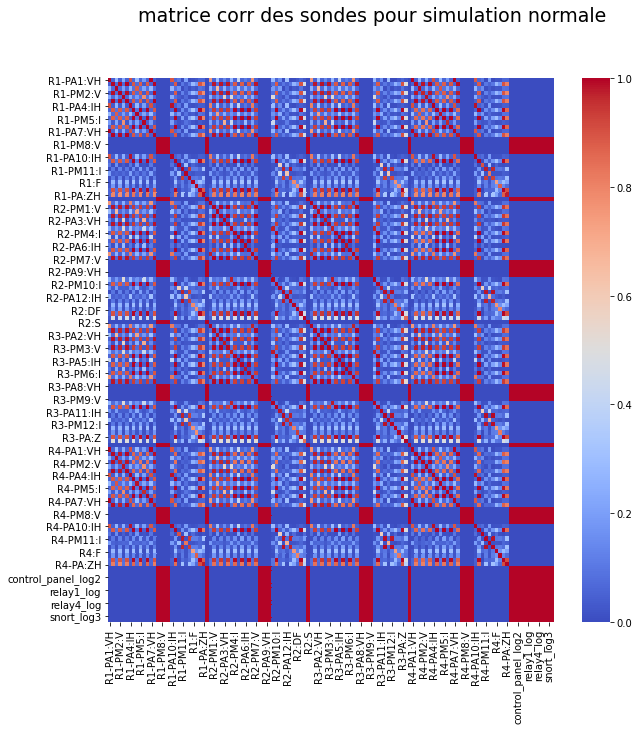

In [48]:

tabcorr=data_1[data_1['marker']==0].drop(['marker'],axis=1).corr()
plt.figure(figsize=(10,10))
plt.suptitle('matrice corr des sondes pour simulation normale  ',fontsize=19)

sns.heatmap(abs(tabcorr), cmap="coolwarm")
    
plt.show()

In [49]:
#comme le circuit électrique se répète, on observe un schema récurrent

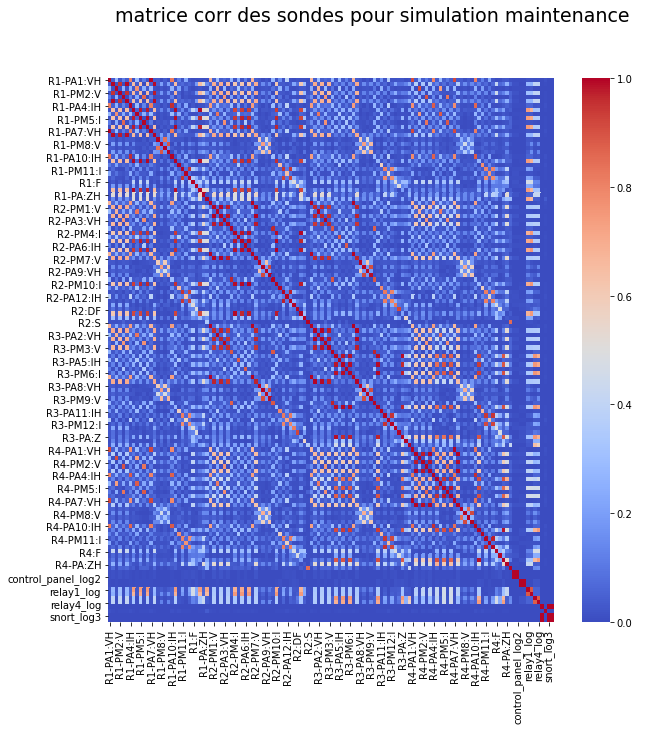

In [50]:

tabcorr=data_1[data_1['marker']==1].drop(['marker'],axis=1).corr()
plt.figure(figsize=(10,10))
plt.suptitle('matrice corr des sondes pour simulation maintenance  ',fontsize=19)

sns.heatmap(abs(tabcorr), cmap="coolwarm")
    
plt.show()

In [51]:
#certaines zones sont en couleur
#il pourrait s'agir des zones où il a de la maintenance

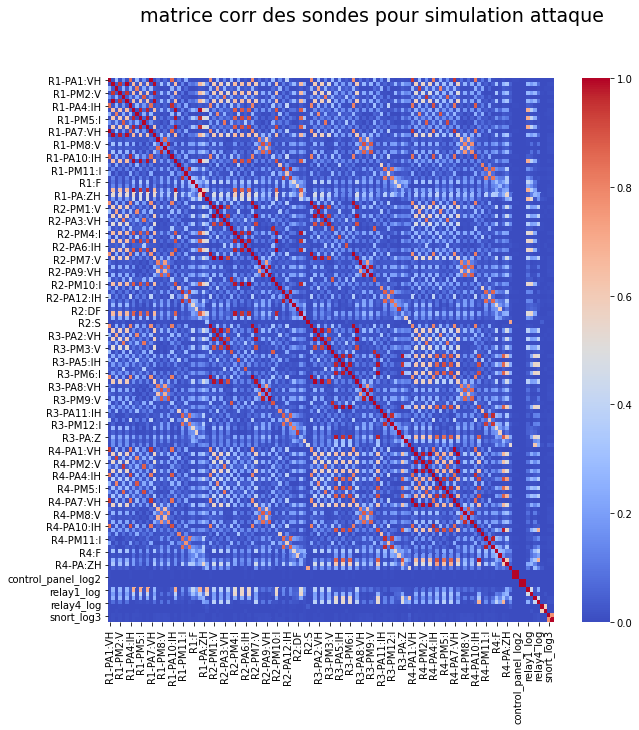

In [52]:

tabcorr=data_1[data_1['marker']==2].drop(['marker'],axis=1).corr()
plt.figure(figsize=(10,10))
plt.suptitle('matrice corr des sondes pour simulation attaque  ',fontsize=19)

sns.heatmap(abs(tabcorr), cmap="coolwarm")
    
plt.show()

In [53]:
#meme chose, des zones sont en rouge


#on a encore le même souci que pour la visualisation plus haut
#les non-attaques ne sont pas assez nombreux, on ne peut pas donc visualisation avec fiabilité
#les caractéristiques de celles ci

Text(0, 0.5, 'Distance ki² entre simulation 1 et 2 ( normales )')

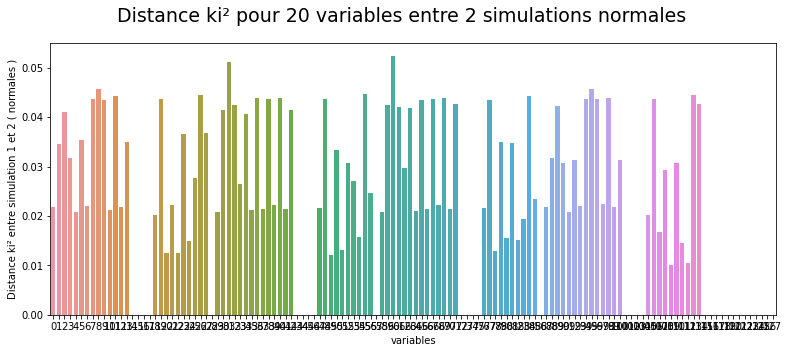

In [60]:
refNonAttaque = data_1[data_1['marker']==0].drop(['marker'],axis=1)


data_1x = refNonAttaque.sample(frac=0.5)
data_2x = refNonAttaque.drop(data_1x.index)

from scipy.stats import energy_distance
distancedistr = []
for sonde in data_1x.columns:
    distancedistr.append(energy_distance(data_1x[sonde],data_2x[sonde]))
plt.figure(figsize=(13,5))
sns.barplot(np.arange(0,len(distancedistr)),distancedistr)
plt.suptitle('Distance ki² pour 20 variables entre 2 simulations normales' ,fontsize=19)
plt.xlabel('variables')
plt.ylabel('Distance ki² entre simulation 1 et 2 ( normales )')

Text(0, 0.5, 'Distance ki² entre simulation 1 et 2 ( normales )')

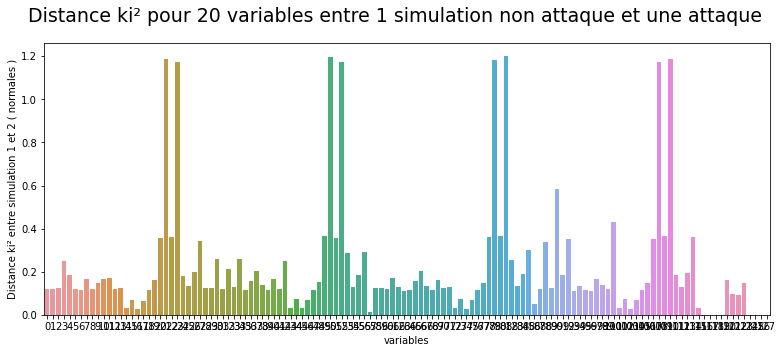

In [61]:
refNonAttaque = data_1[data_1['marker']==0].drop(['marker'],axis=1)

refAttaque = data_1[data_1['marker']==2].drop(['marker'],axis=1)


from scipy.stats import energy_distance
distancedistr = []
for sonde in refNonAttaque.columns:
    distancedistr.append(energy_distance(refNonAttaque[sonde],refAttaque[sonde]))
plt.figure(figsize=(13,5))
sns.barplot(np.arange(0,len(distancedistr)),distancedistr)
plt.suptitle('Distance ki² pour 20 variables entre 1 simulation non attaque et une attaque' ,fontsize=19)
plt.xlabel('variables')
plt.ylabel('Distance ki² entre simulation 1 et 2 ( normales )')

In [ ]:
#bon, il est compliqué d'analyser toutes les variables car elles sont trop nombreuses
#par contre, on observe qu'il y a une grosse difference ki square entre plusieurs variables 